In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import reader
import visualize 
import preprocessing

from scipy import stats
import scipy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
from scipy.io import wavfile 
from scipy.ndimage import median_filter

from random import shuffle
import neurokit2 as nk

In [4]:
pts = [i for i in range(1, 74, 1)]

win_size = 15.0
stride = 1.0

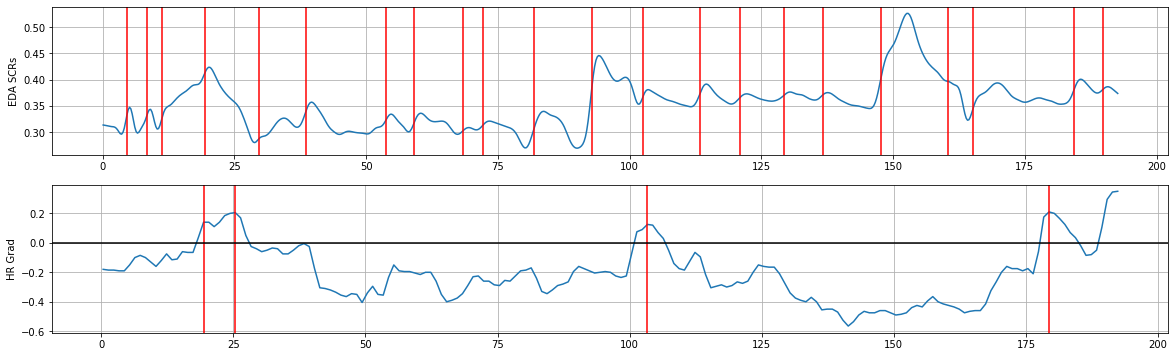

<Figure size 432x288 with 0 Axes>

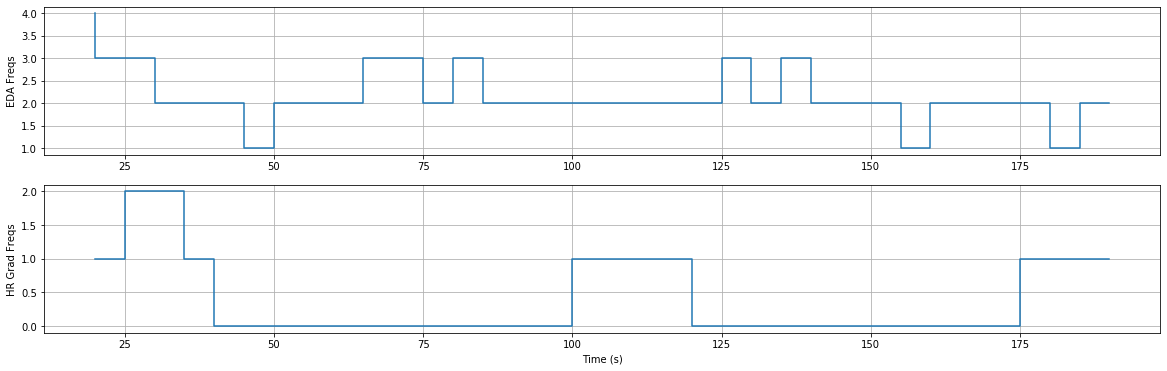

Participant 002 does not have baselines


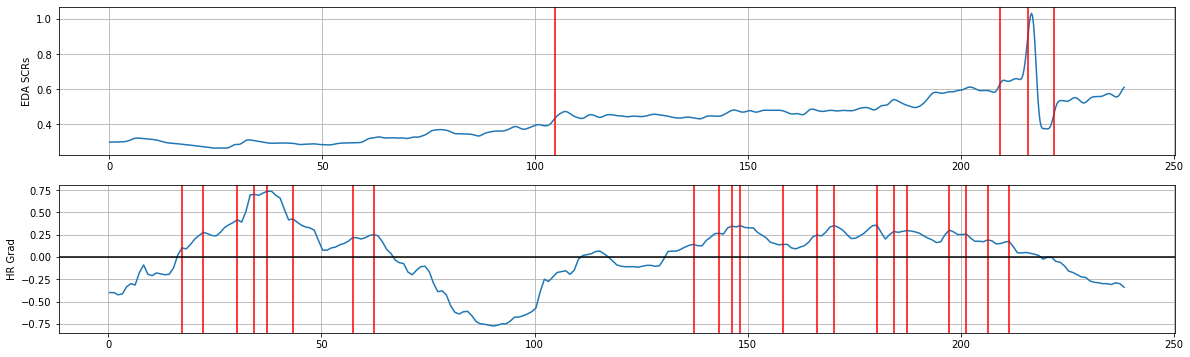

<Figure size 432x288 with 0 Axes>

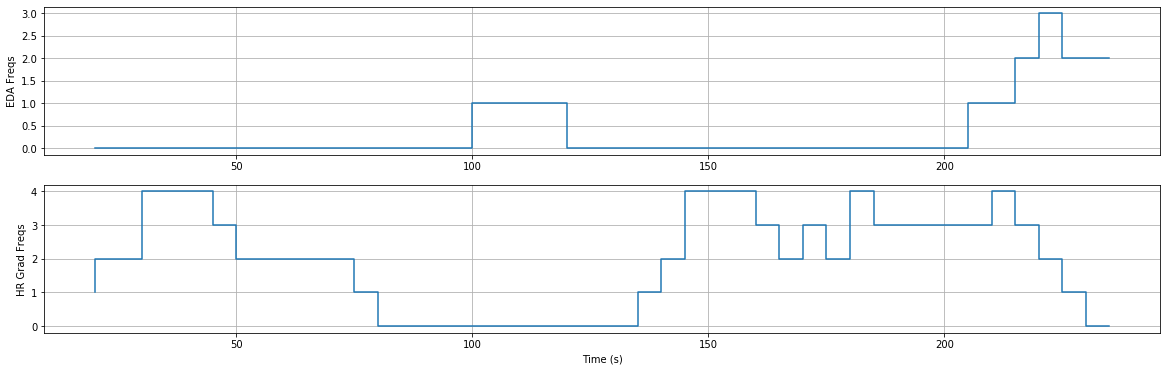

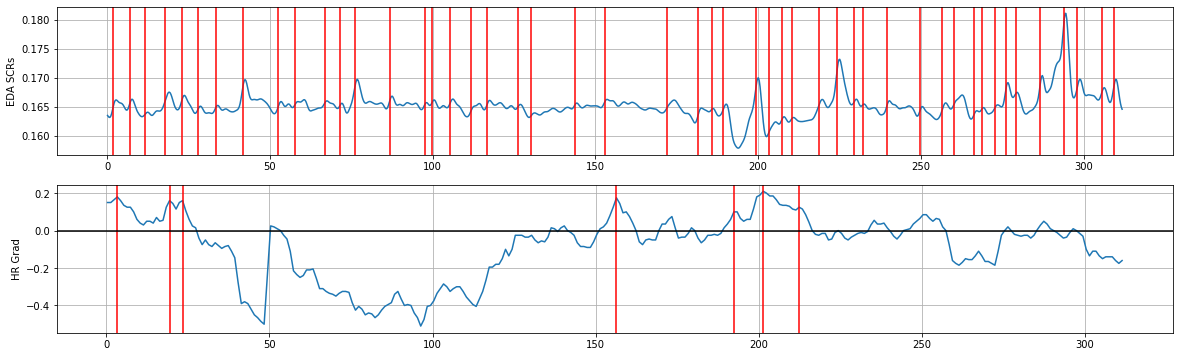

<Figure size 432x288 with 0 Axes>

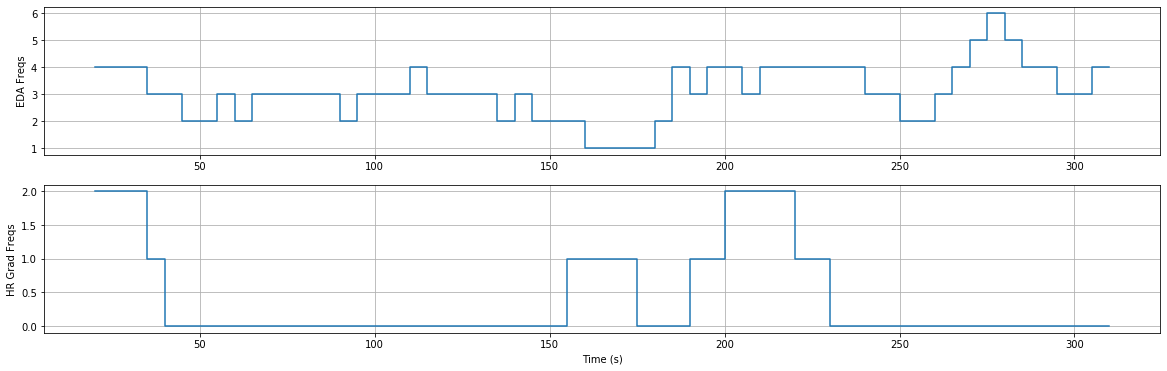

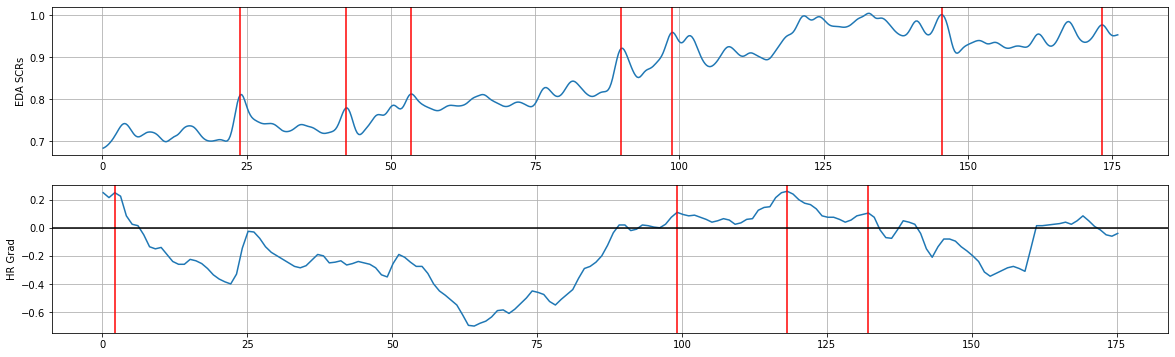

<Figure size 432x288 with 0 Axes>

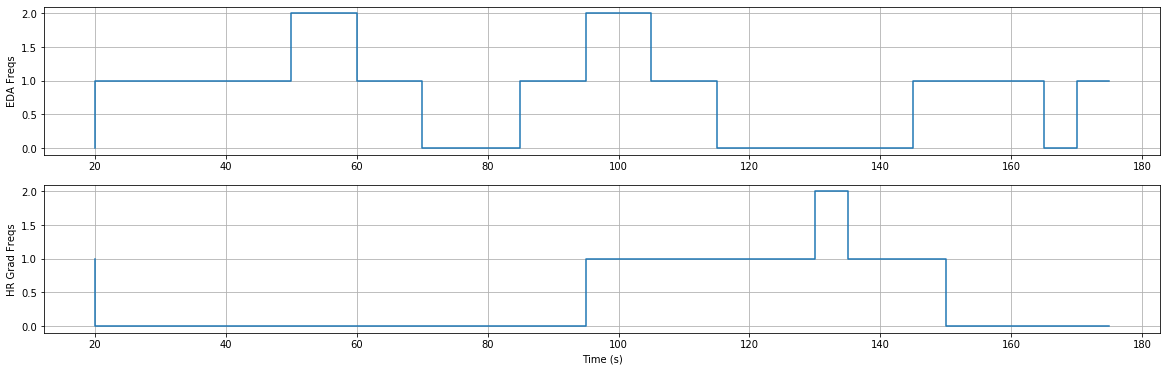

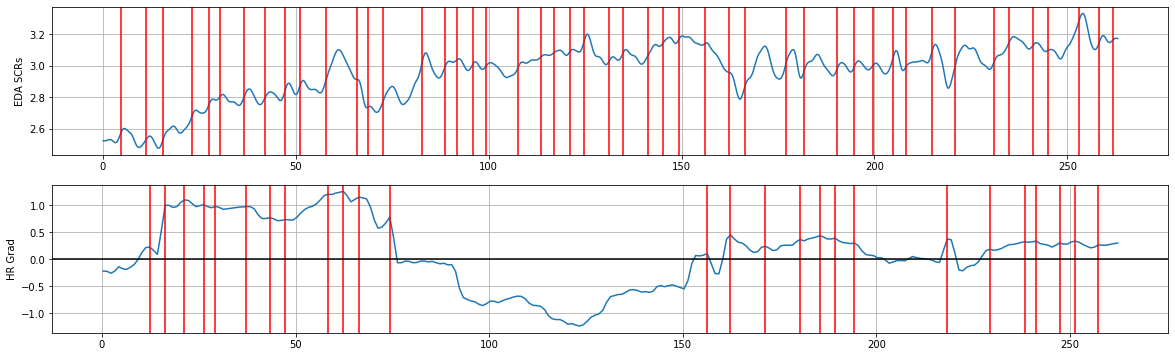

<Figure size 432x288 with 0 Axes>

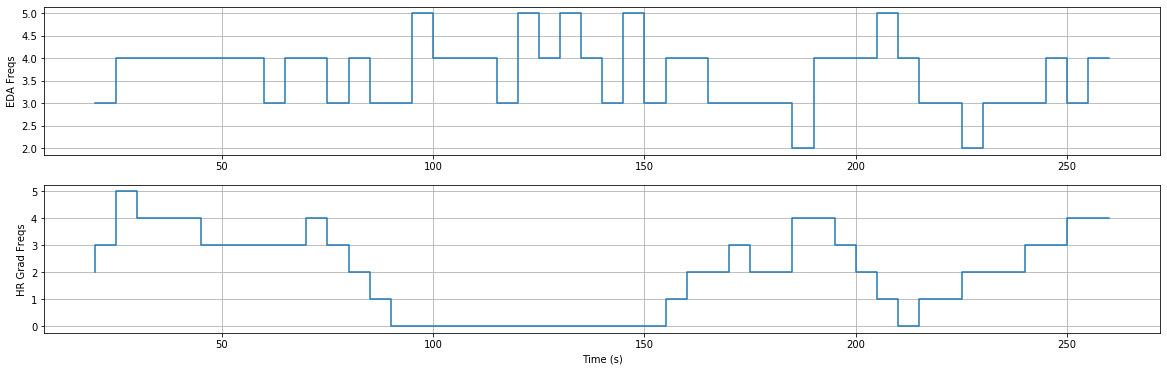

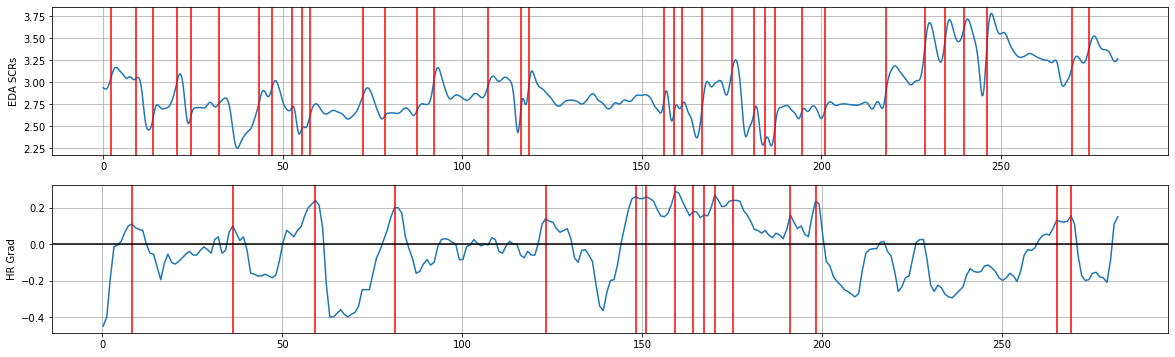

<Figure size 432x288 with 0 Axes>

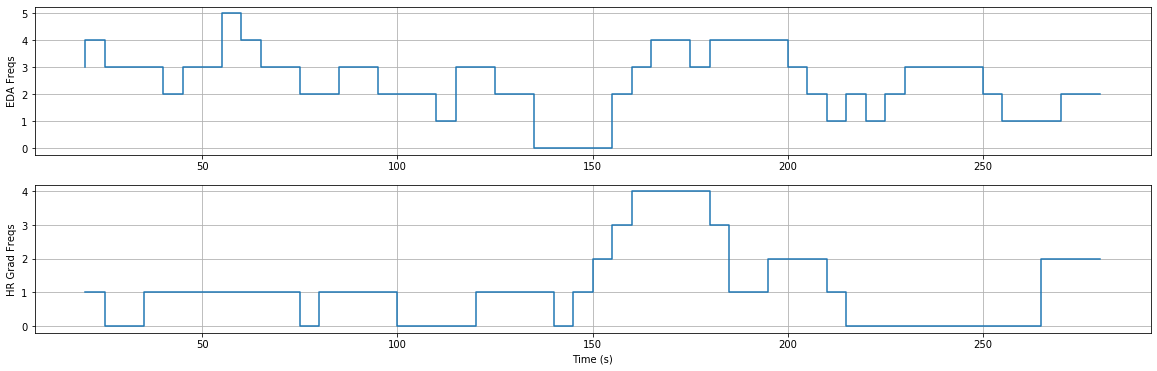

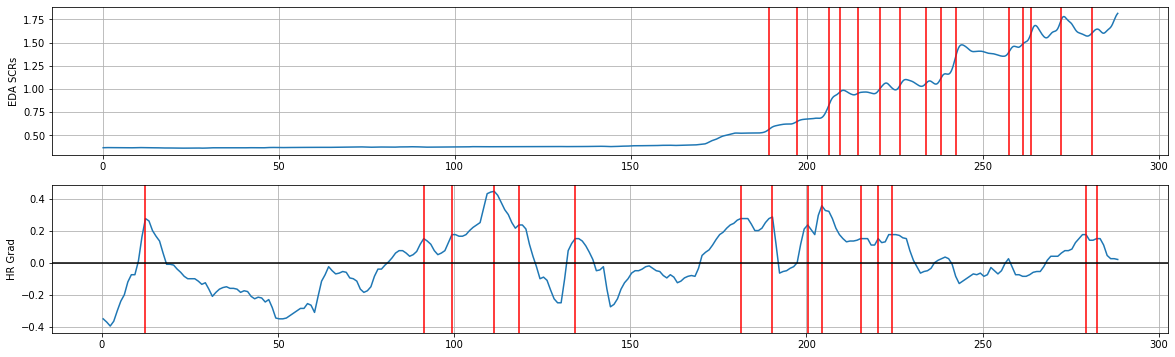

<Figure size 432x288 with 0 Axes>

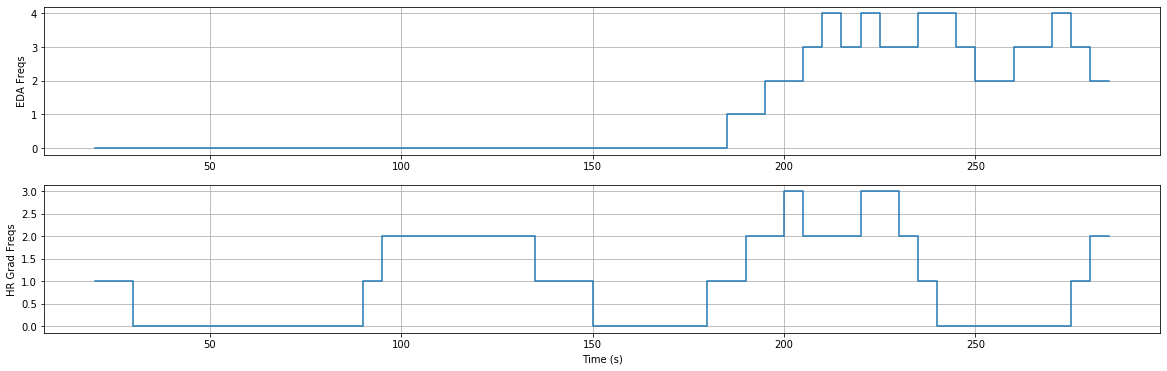

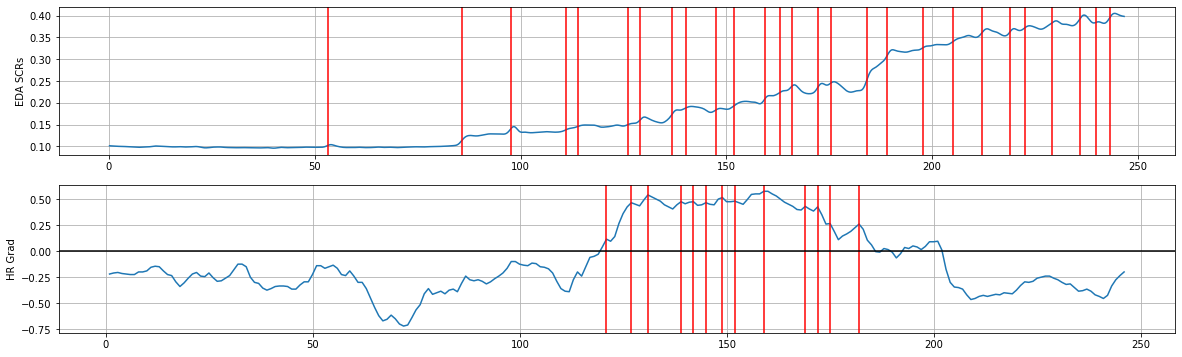

<Figure size 432x288 with 0 Axes>

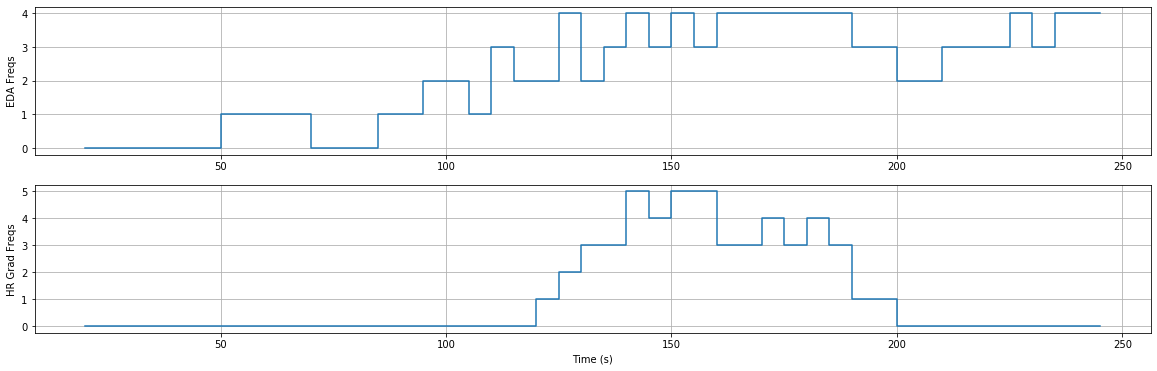

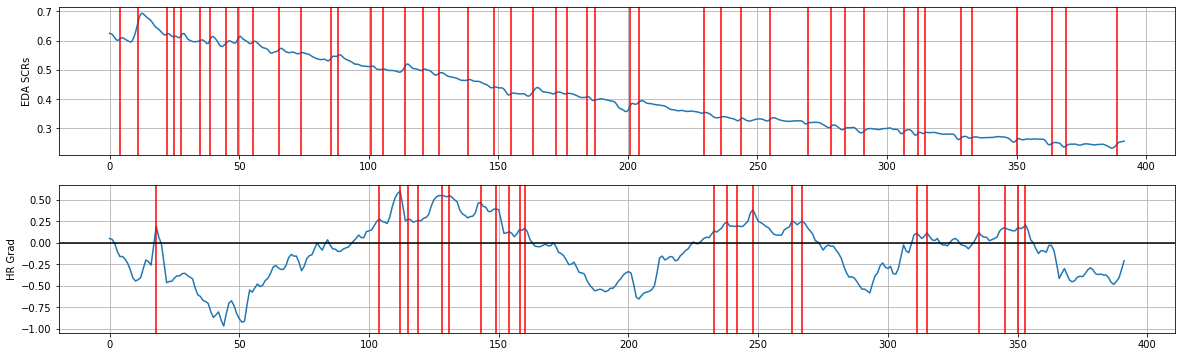

<Figure size 432x288 with 0 Axes>

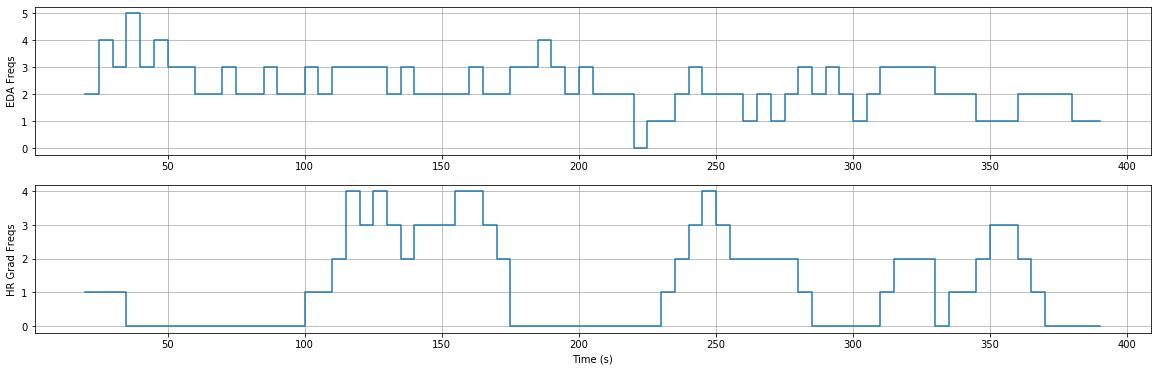

Participant 010 does not have baselines


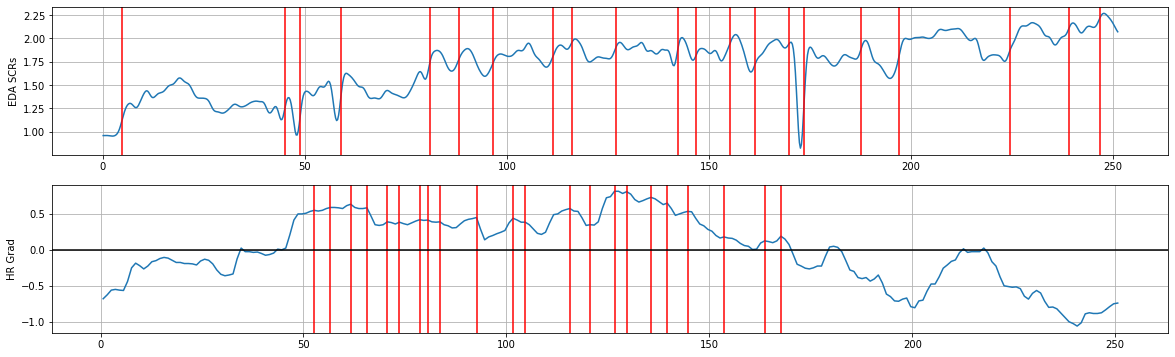

<Figure size 432x288 with 0 Axes>

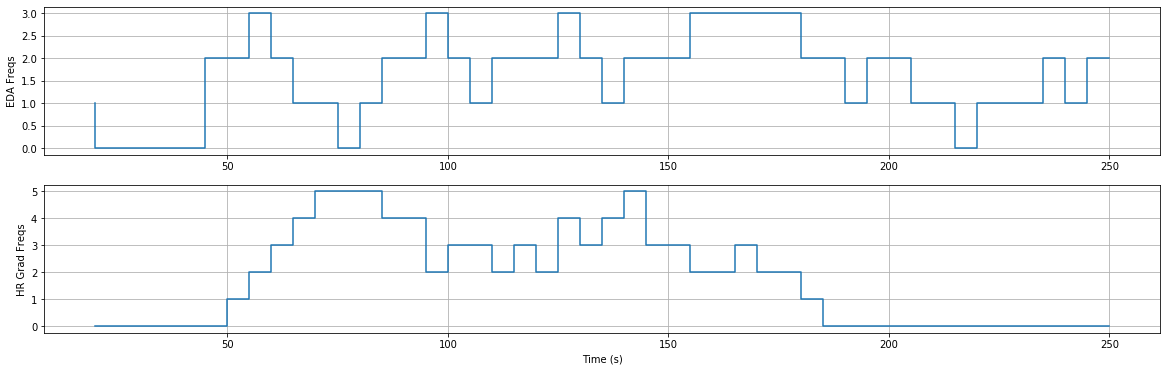

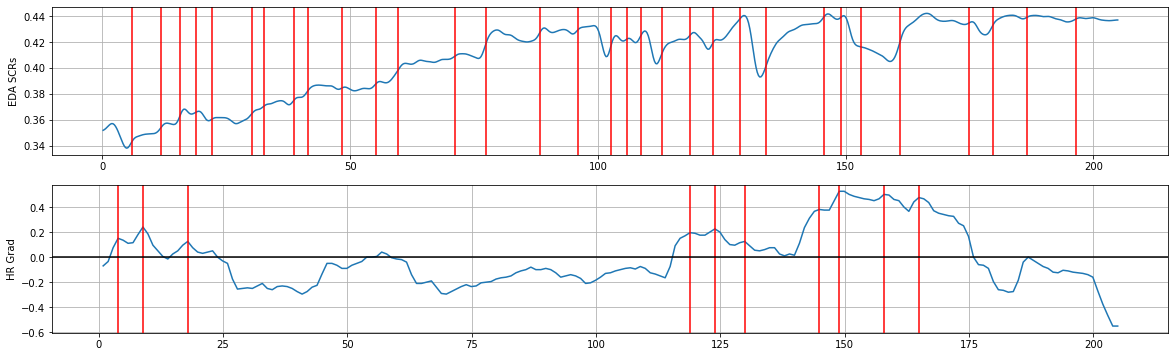

<Figure size 432x288 with 0 Axes>

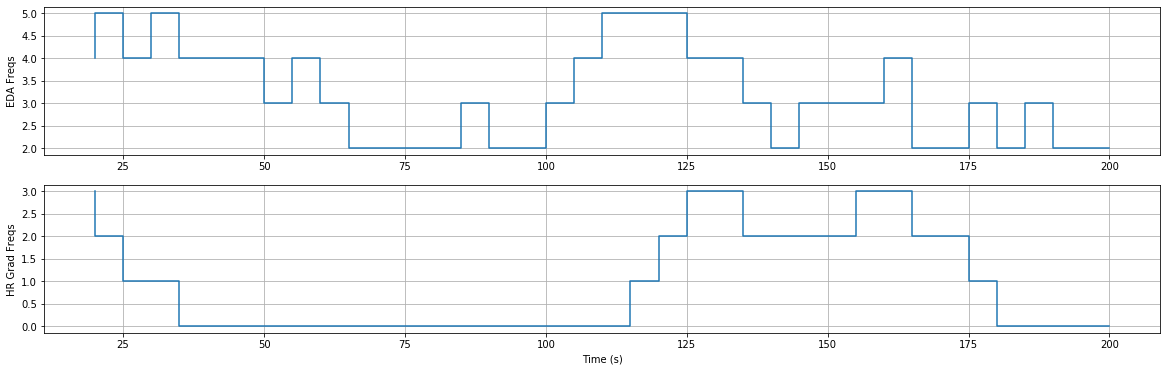

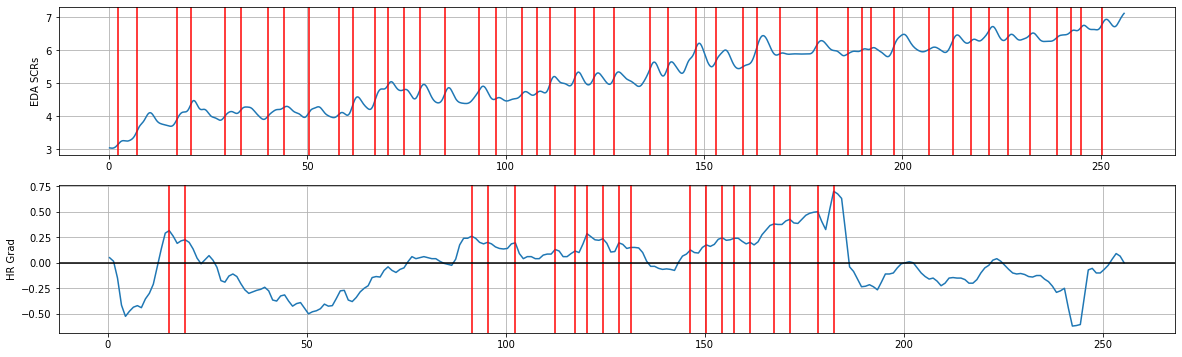

<Figure size 432x288 with 0 Axes>

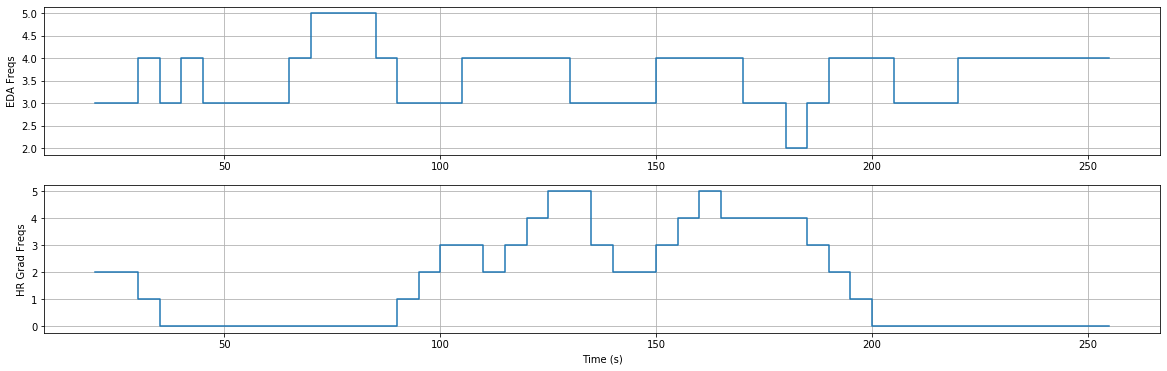

Participant 015 does not have baselines


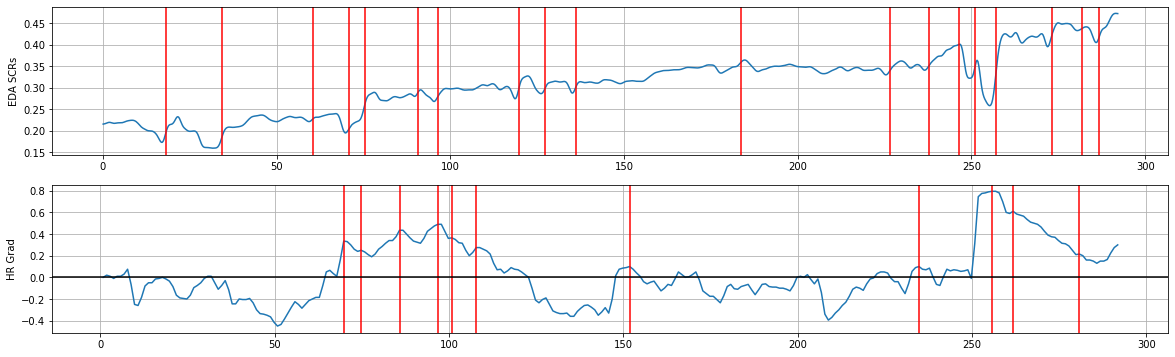

<Figure size 432x288 with 0 Axes>

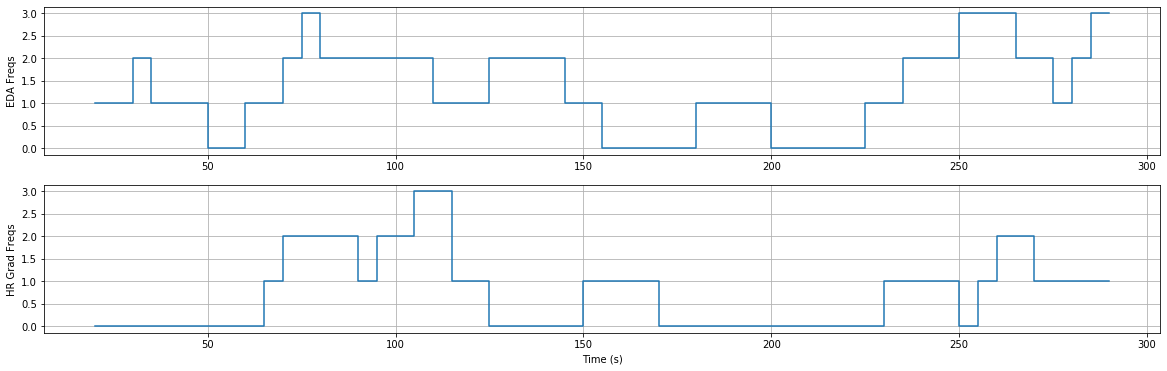

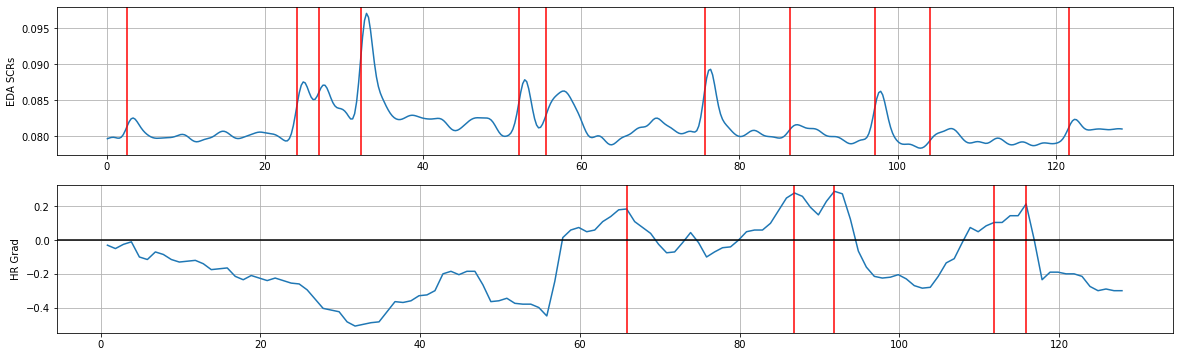

<Figure size 432x288 with 0 Axes>

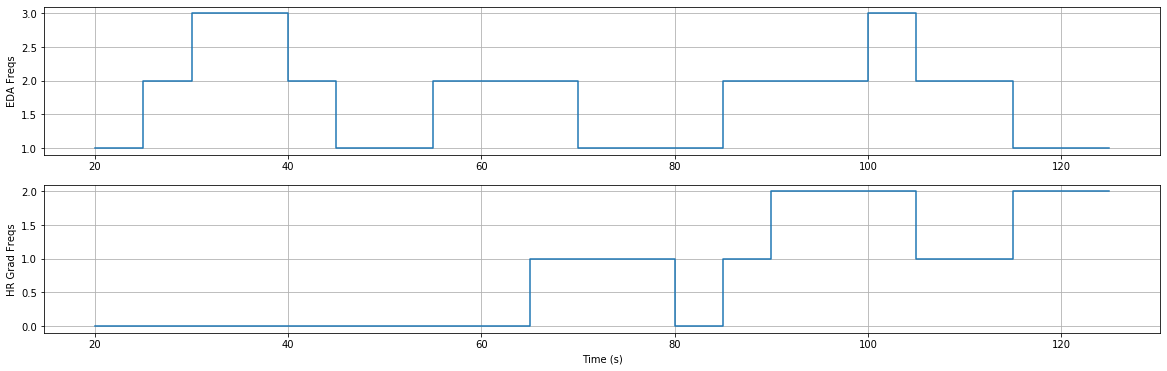

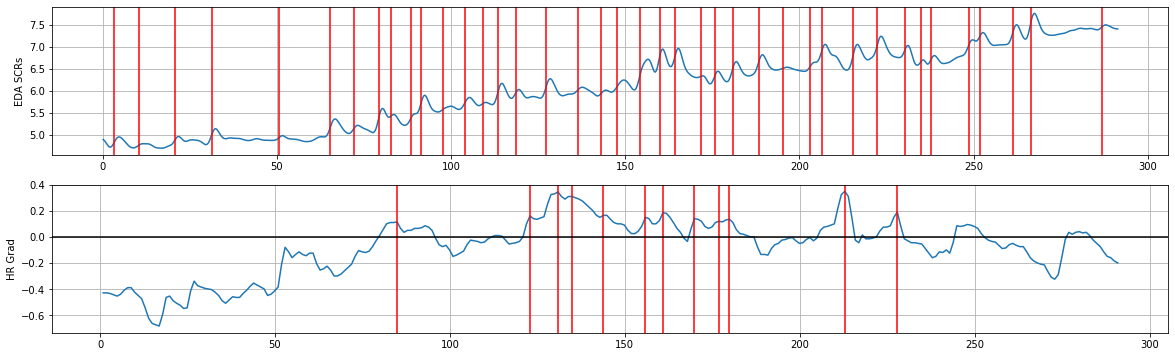

<Figure size 432x288 with 0 Axes>

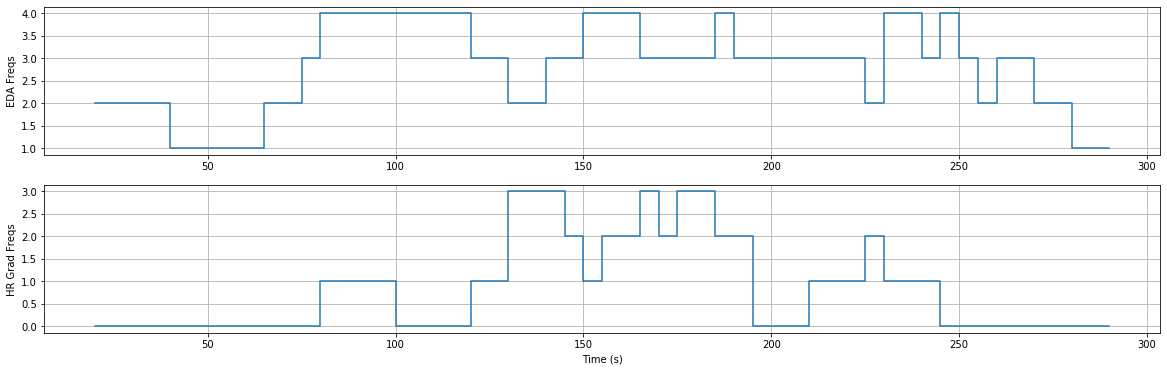

Participant 019 does not have baselines


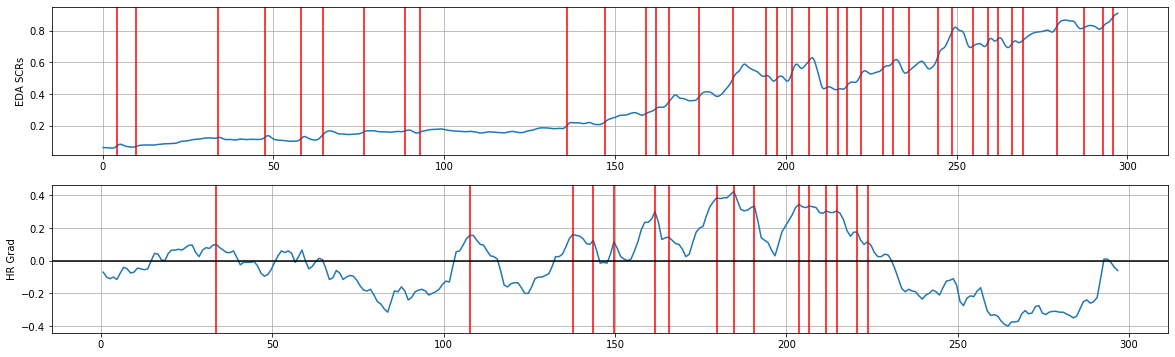

<Figure size 432x288 with 0 Axes>

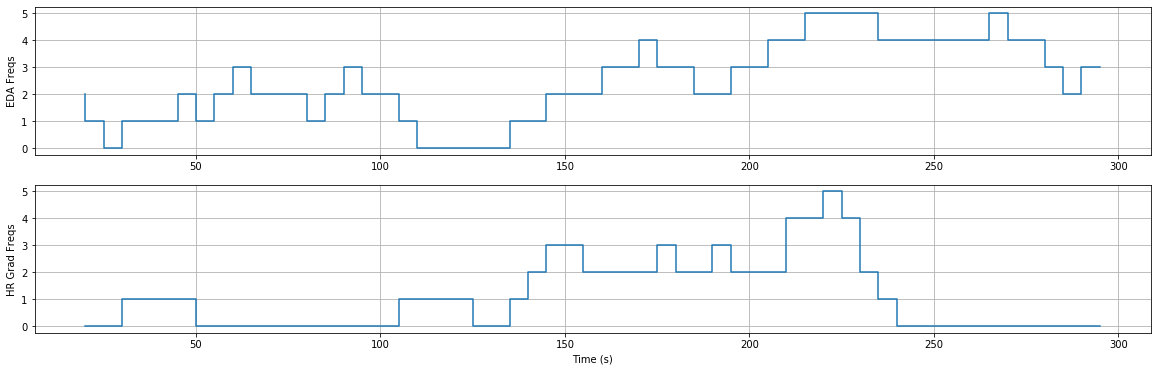

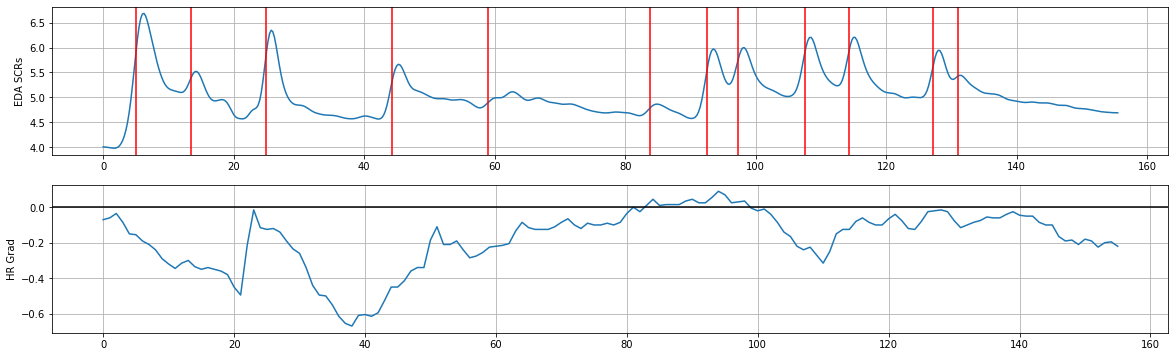

<Figure size 432x288 with 0 Axes>

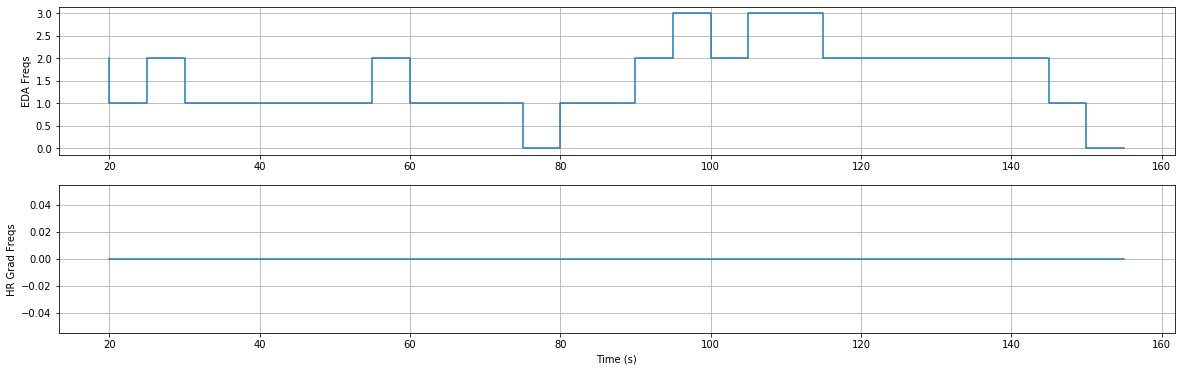

Participant 022 does not have baselines


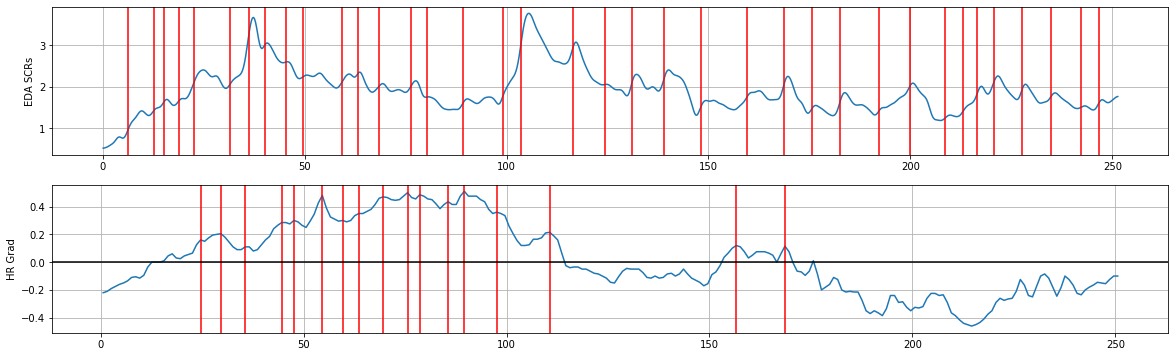

<Figure size 432x288 with 0 Axes>

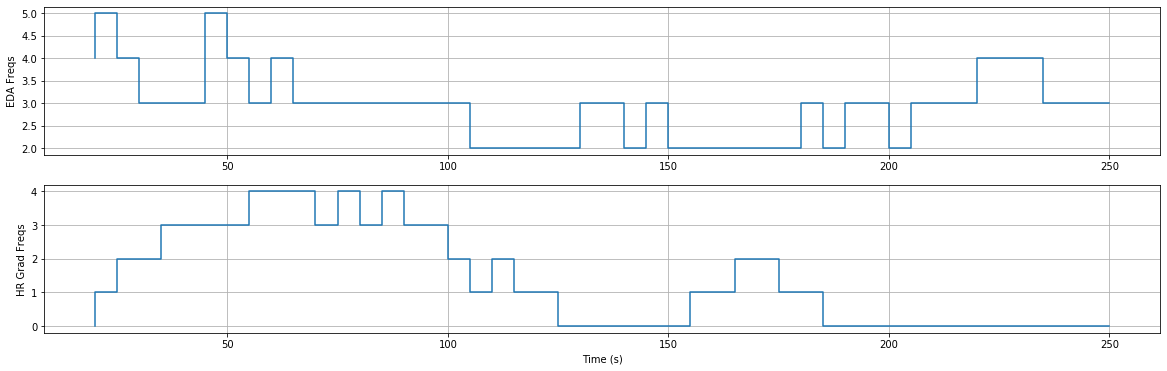

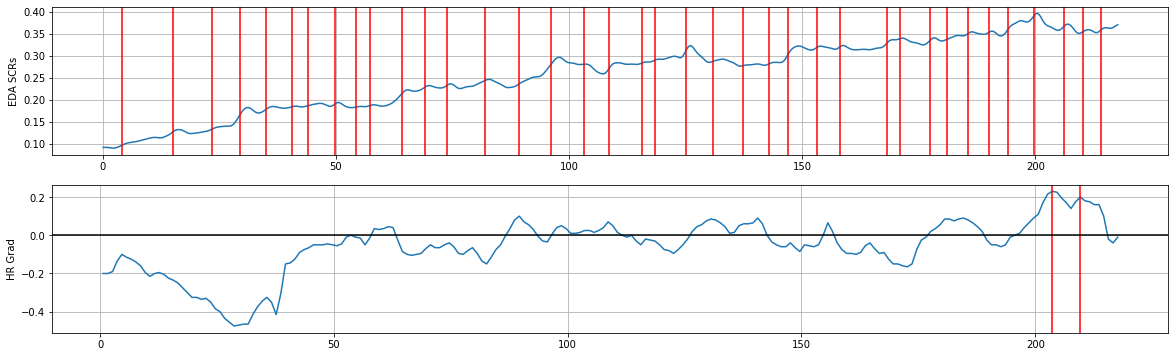

<Figure size 432x288 with 0 Axes>

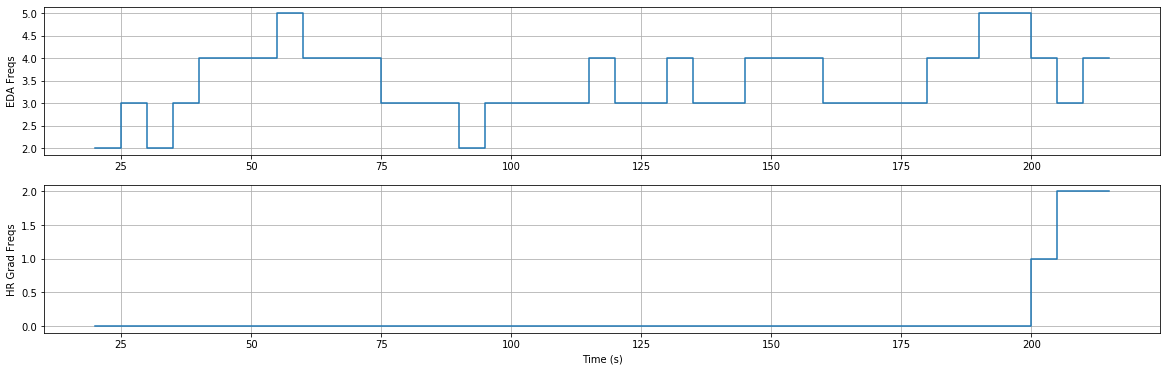

Participant 024 does not have baselines
Participant 025 does not have baselines


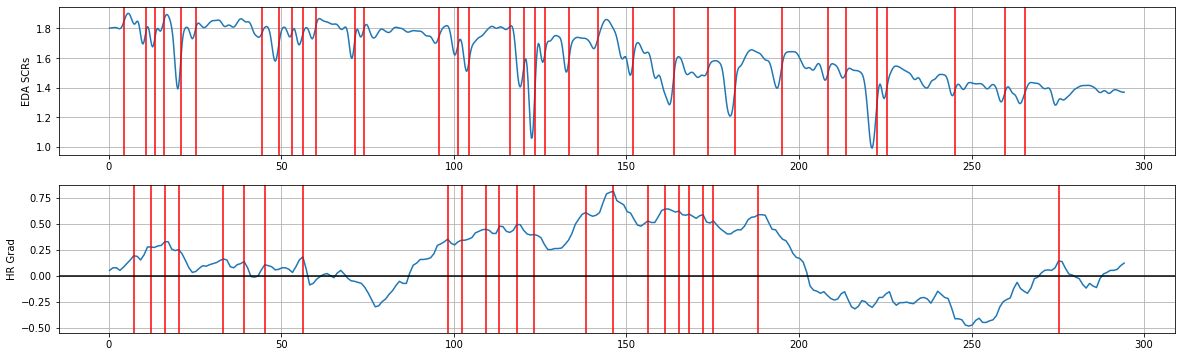

<Figure size 432x288 with 0 Axes>

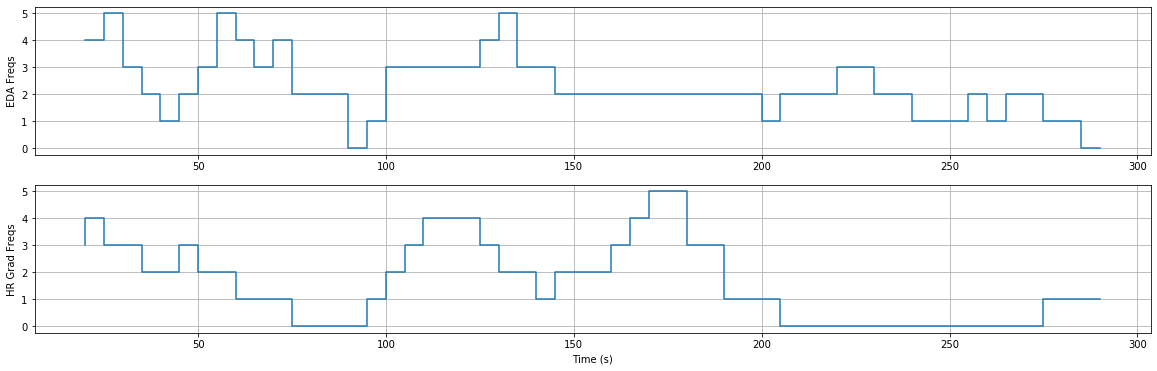

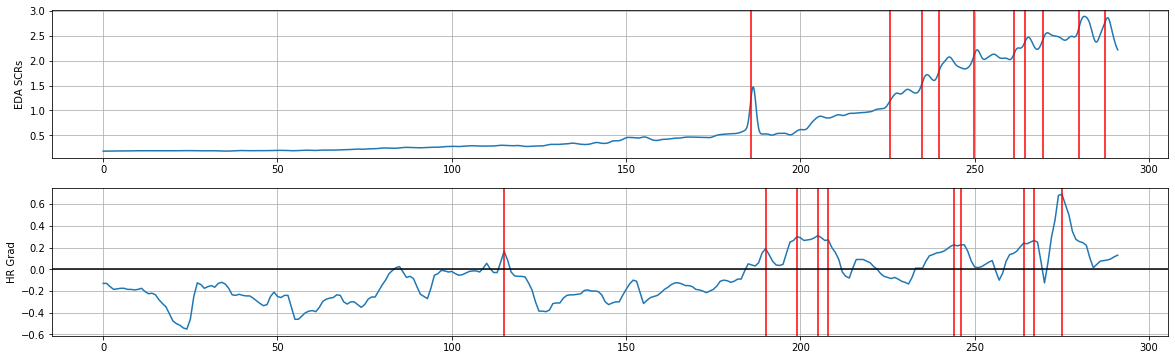

<Figure size 432x288 with 0 Axes>

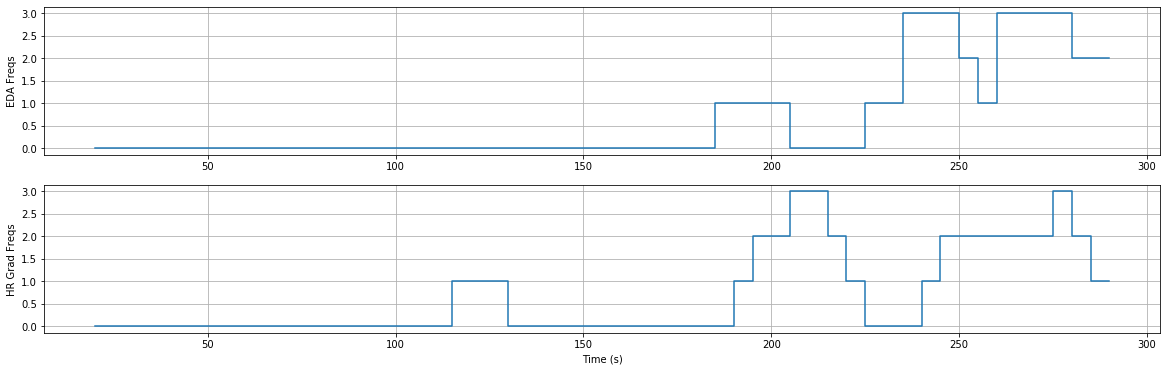

Participant 028 does not have baselines
Participant 029 does not have baselines
Participant 030 does not have baselines


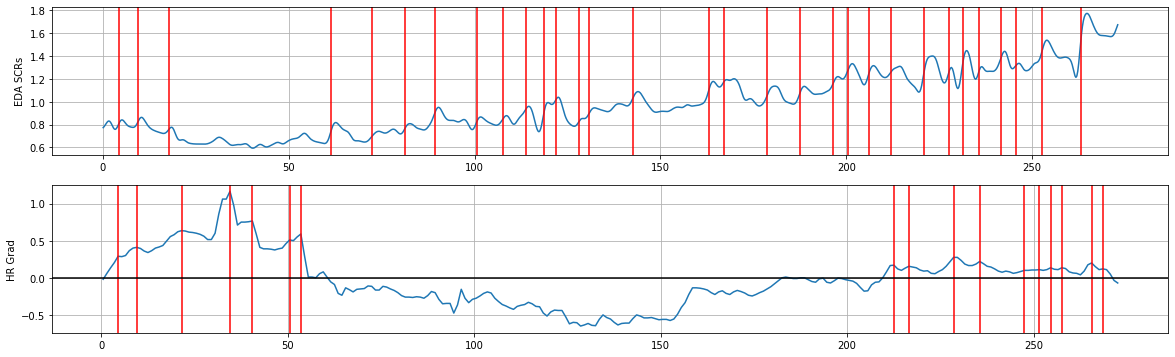

<Figure size 432x288 with 0 Axes>

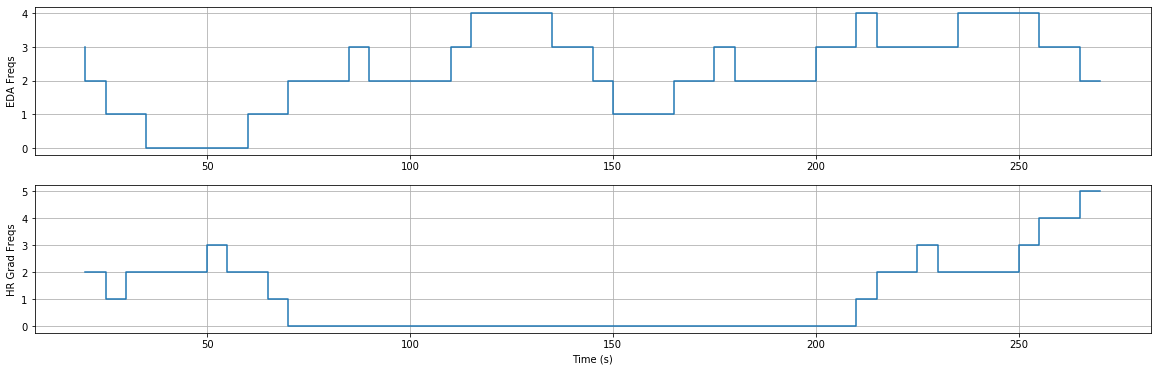

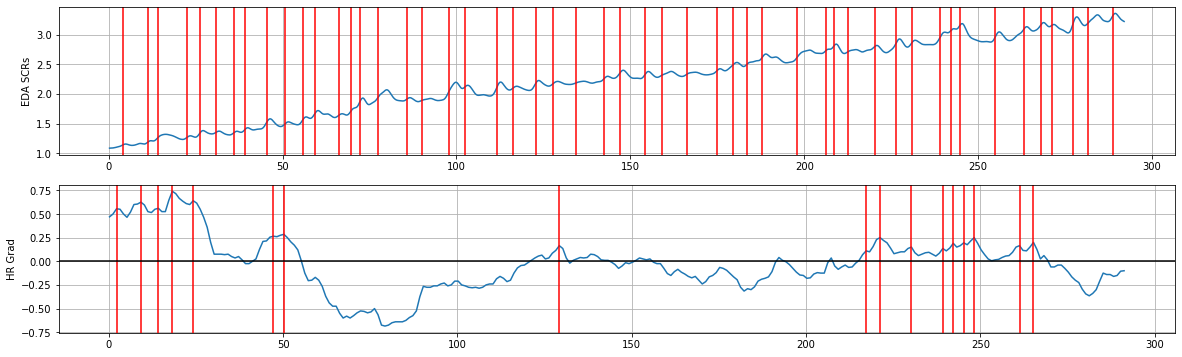

<Figure size 432x288 with 0 Axes>

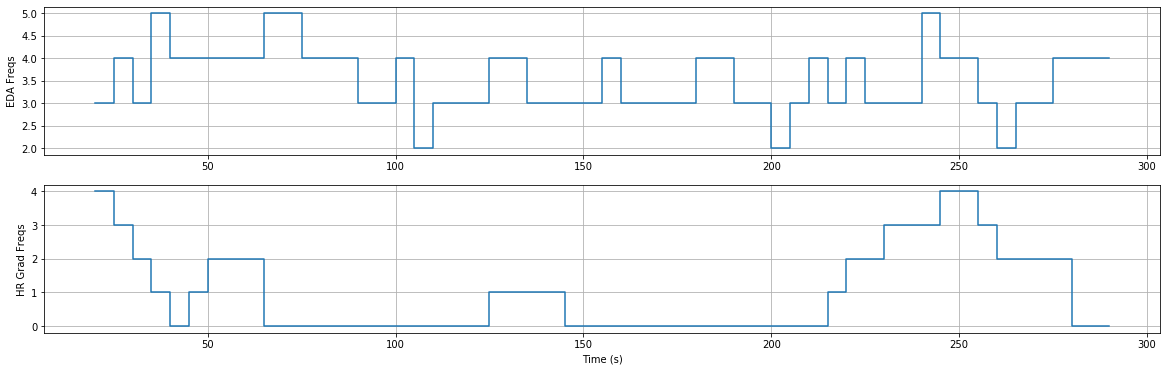

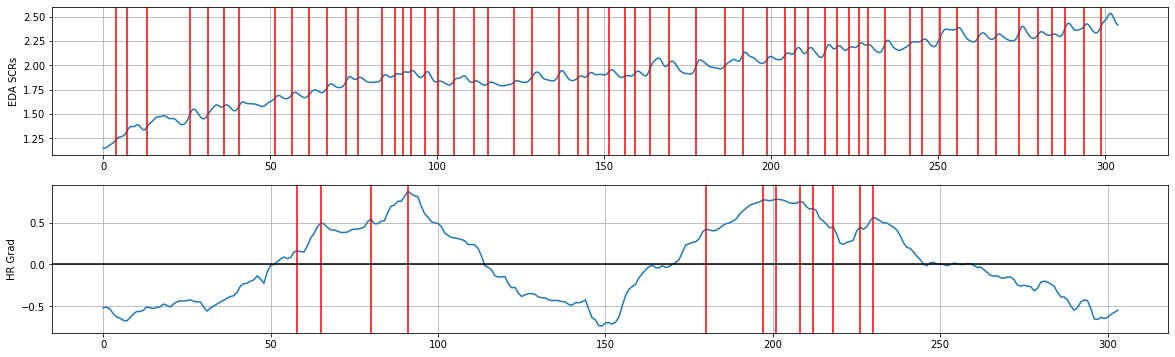

<Figure size 432x288 with 0 Axes>

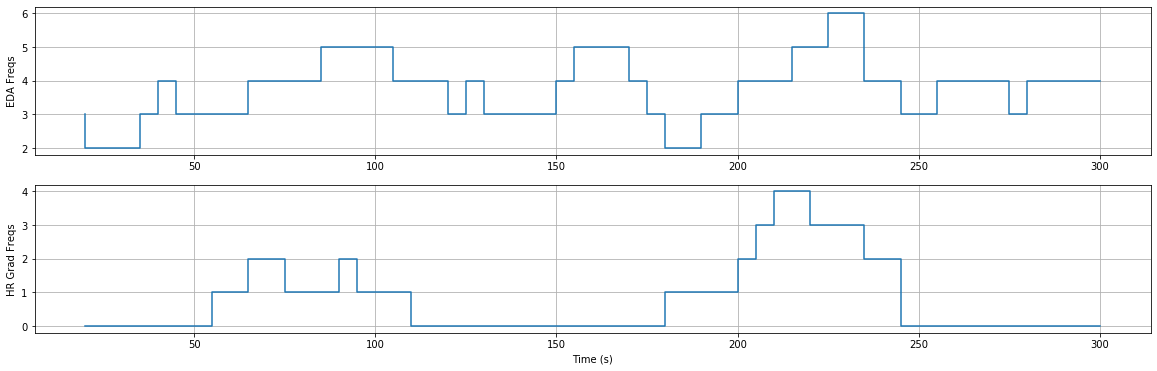

Participant 033 does not have baselines
Participant 034 does not have baselines


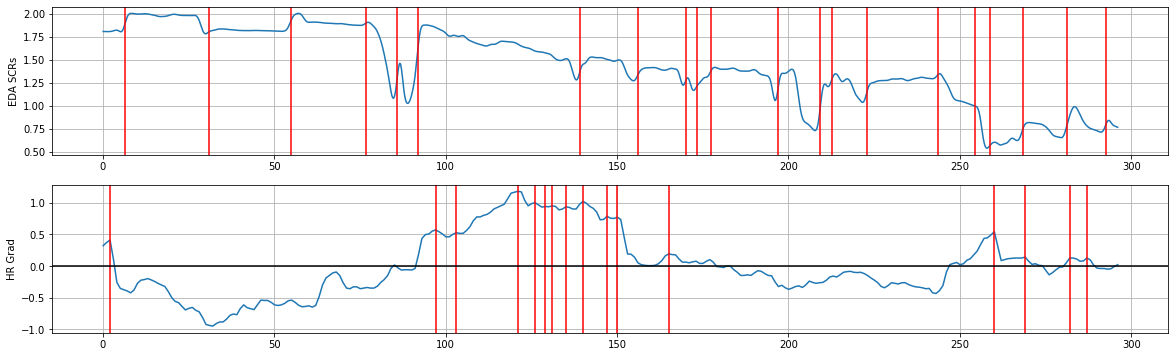

<Figure size 432x288 with 0 Axes>

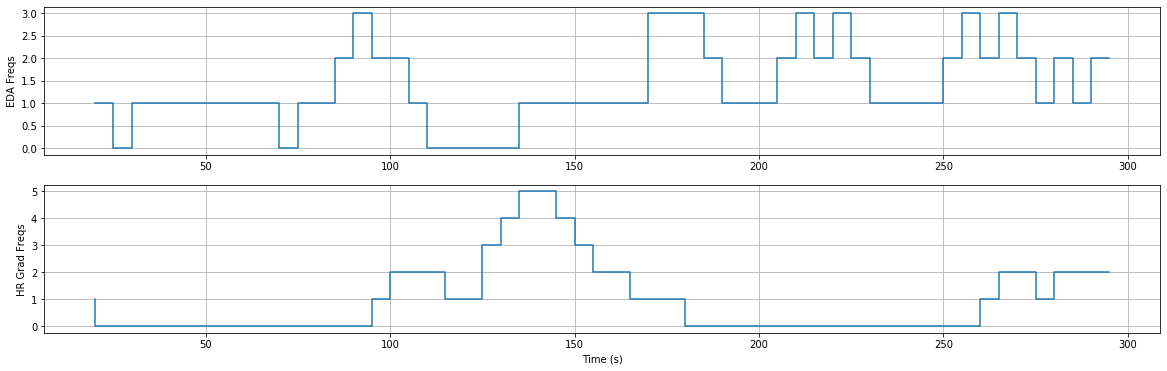

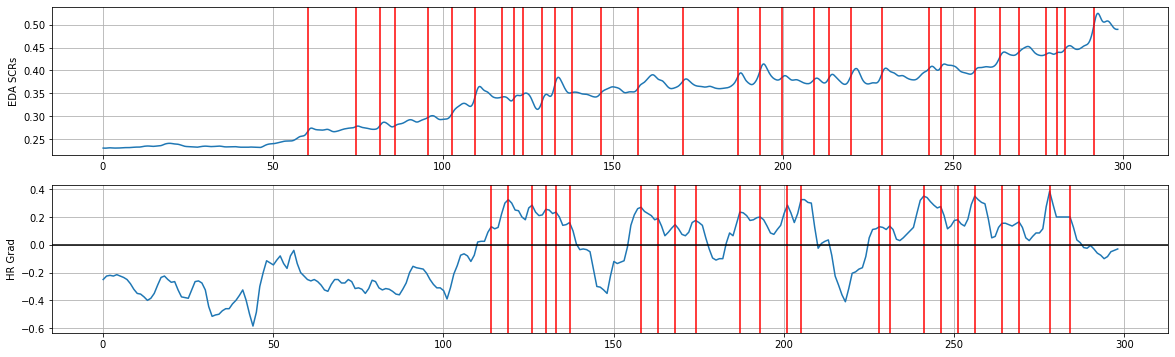

<Figure size 432x288 with 0 Axes>

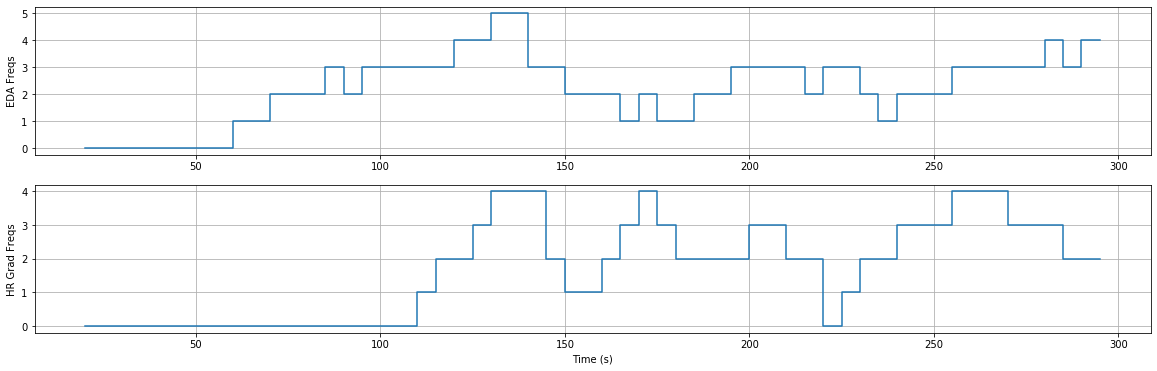

Participant 036 does not have baselines


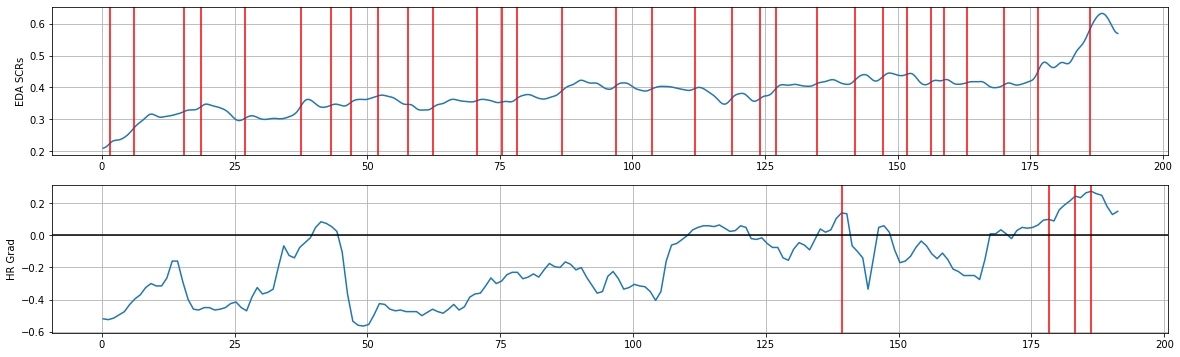

<Figure size 432x288 with 0 Axes>

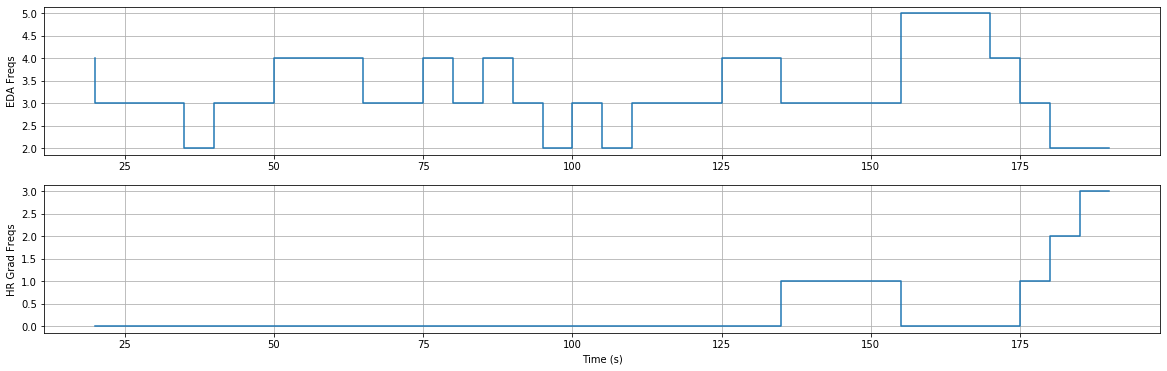

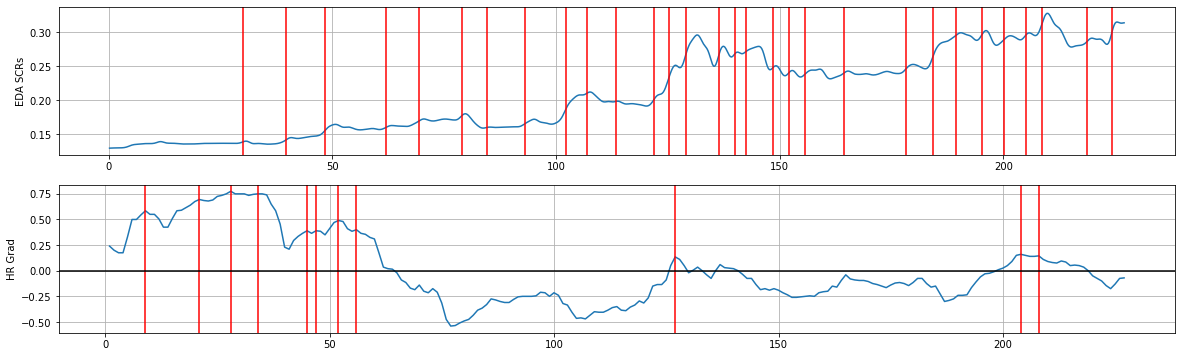

<Figure size 432x288 with 0 Axes>

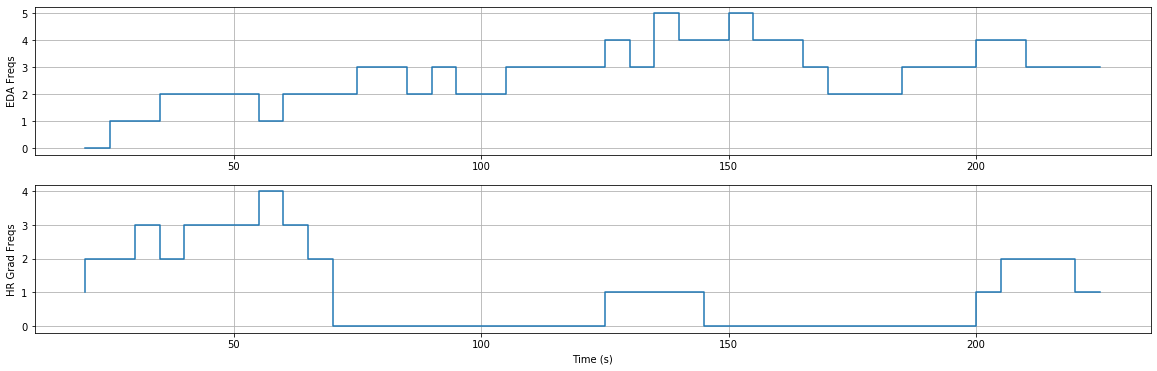

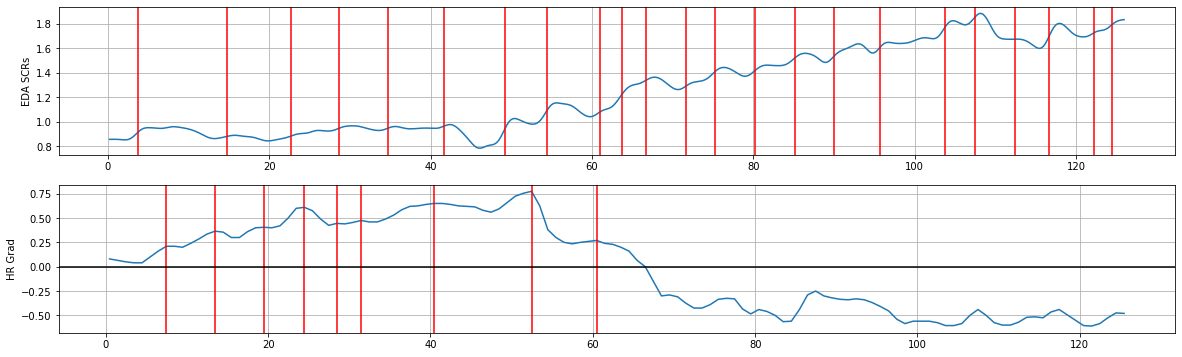

<Figure size 432x288 with 0 Axes>

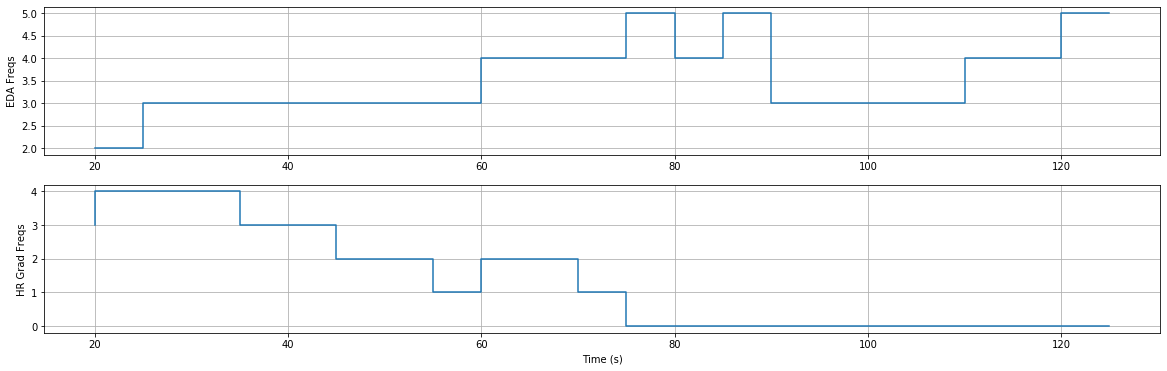

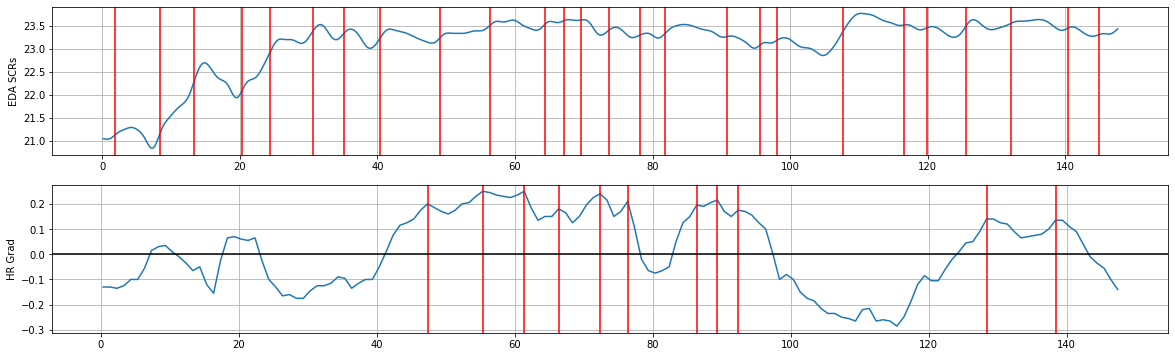

<Figure size 432x288 with 0 Axes>

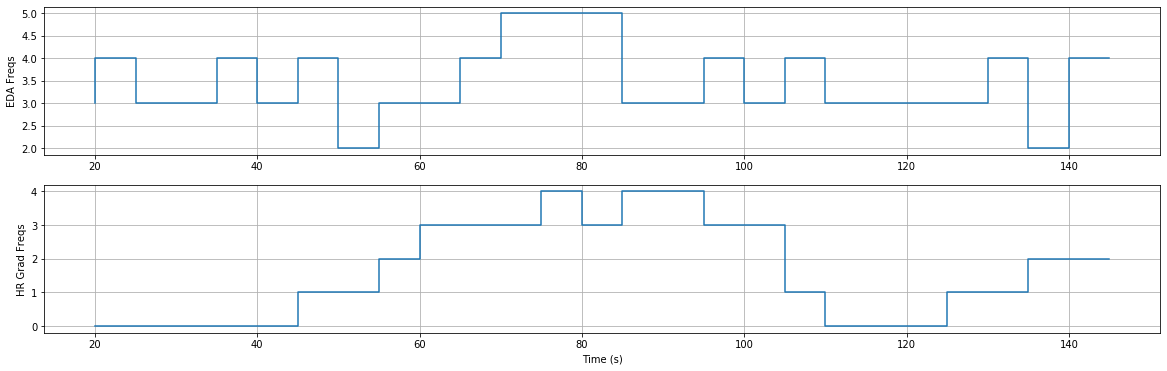

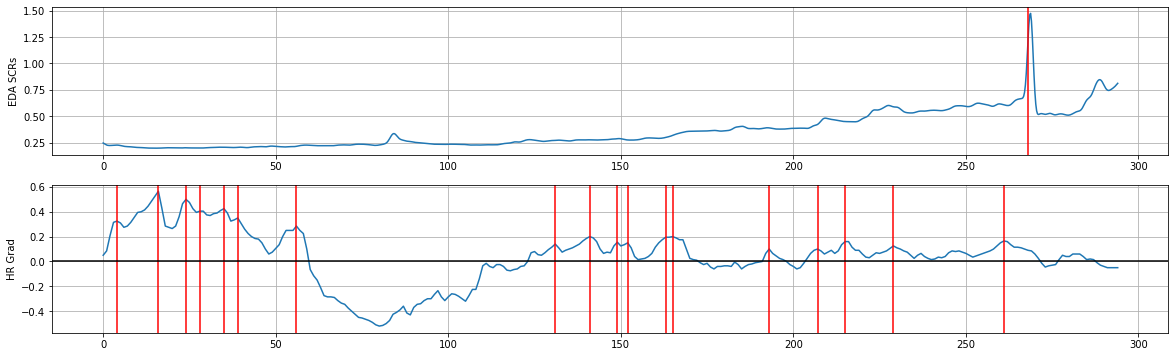

<Figure size 432x288 with 0 Axes>

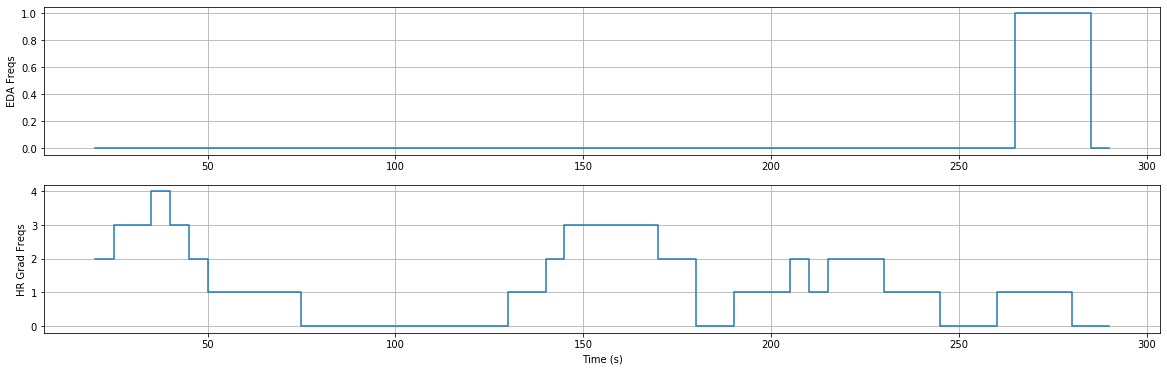

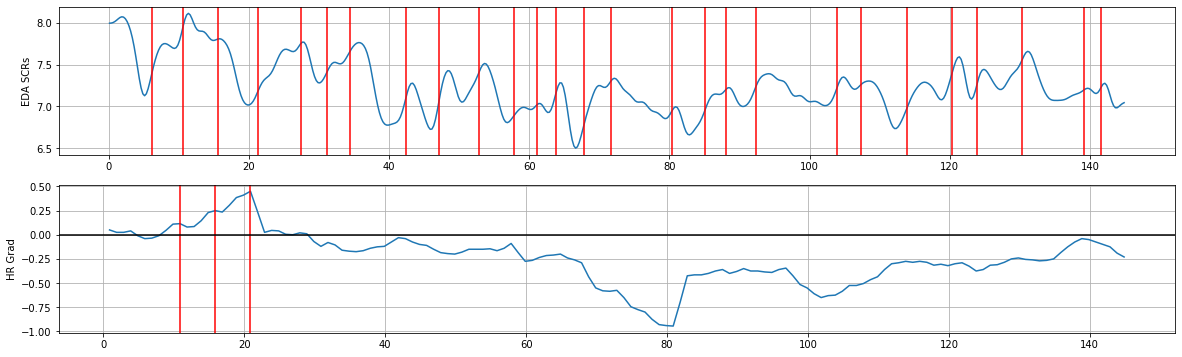

<Figure size 432x288 with 0 Axes>

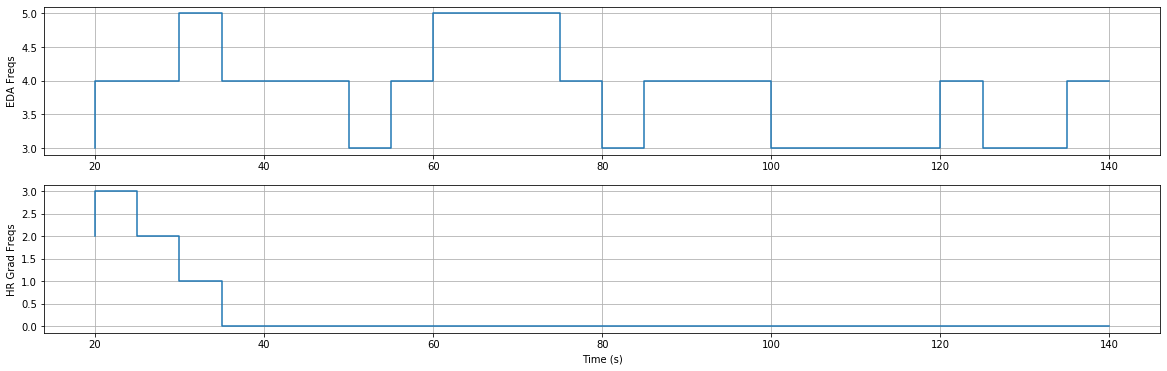

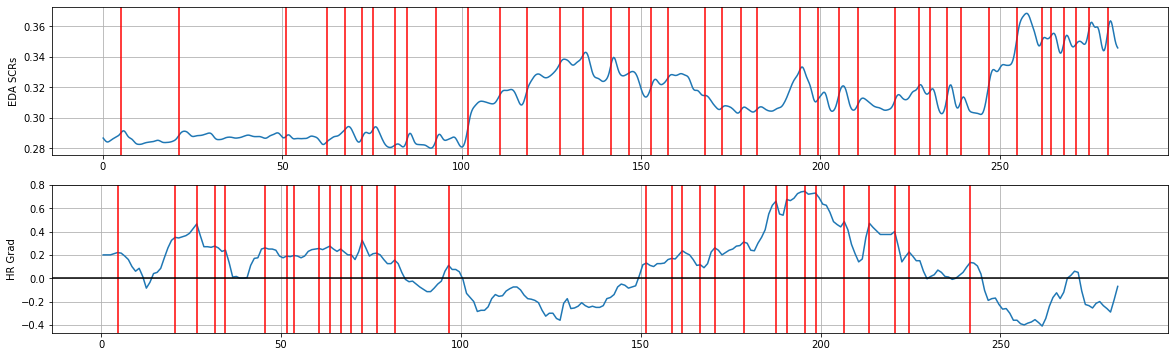

<Figure size 432x288 with 0 Axes>

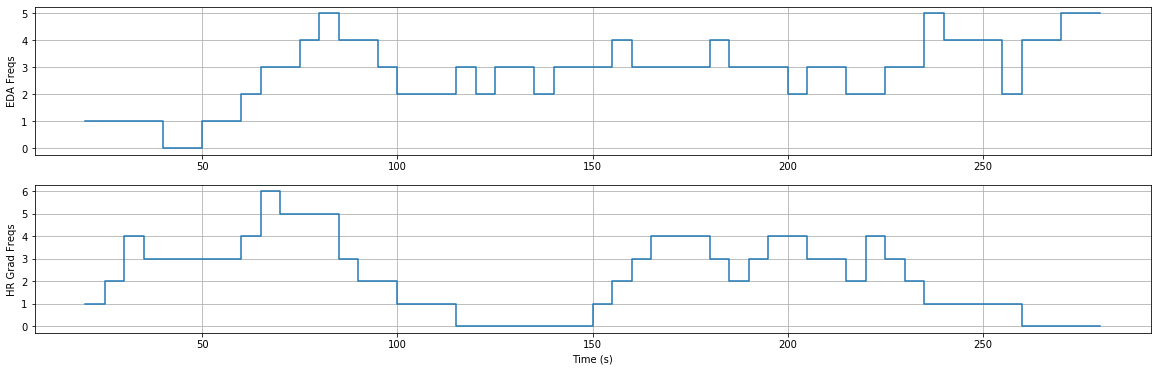

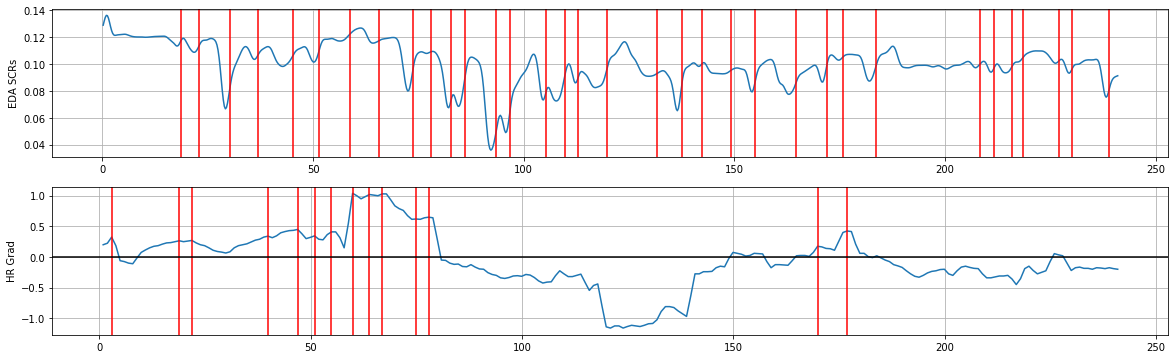

<Figure size 432x288 with 0 Axes>

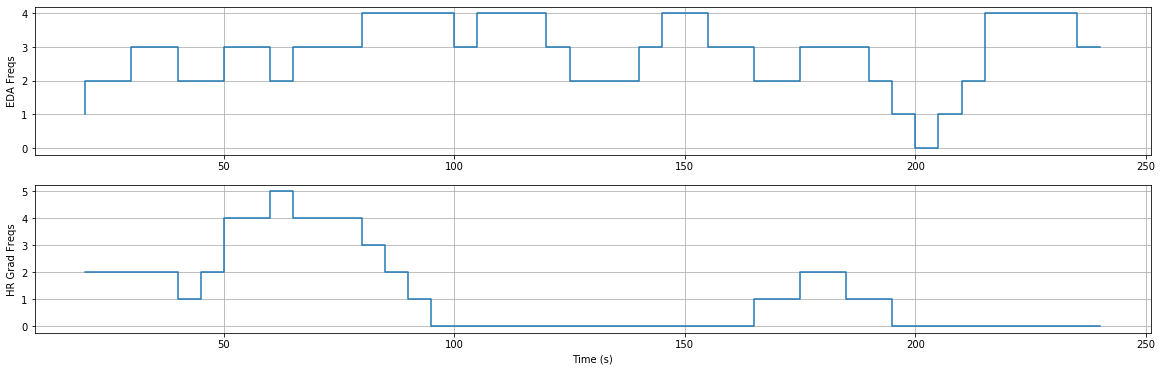

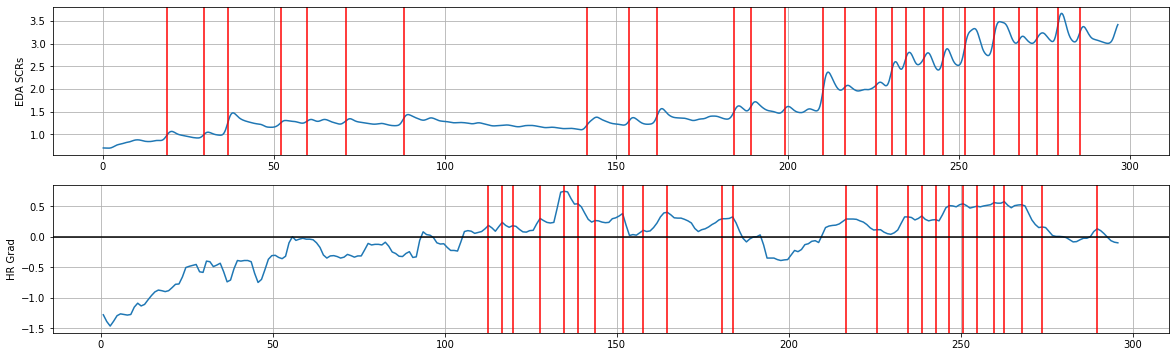

<Figure size 432x288 with 0 Axes>

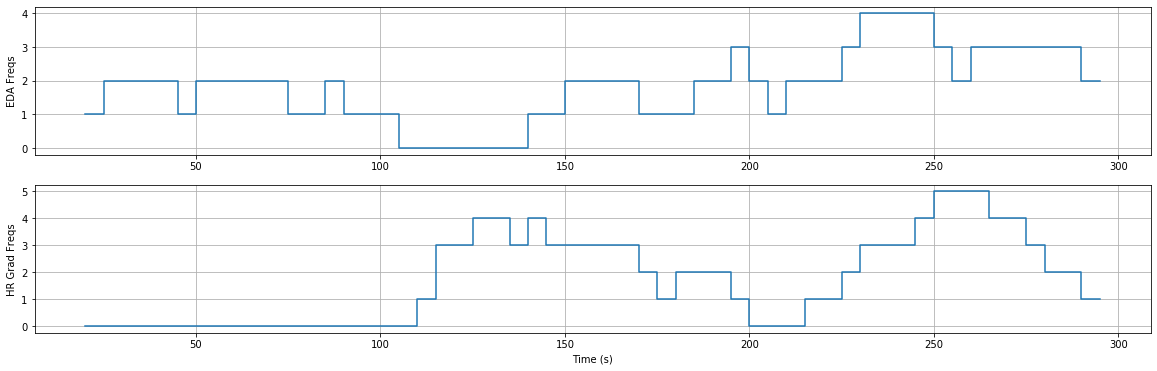

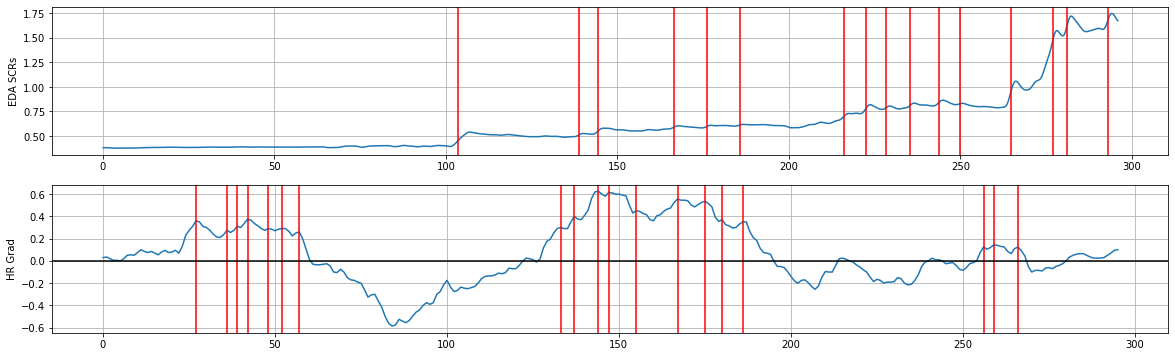

<Figure size 432x288 with 0 Axes>

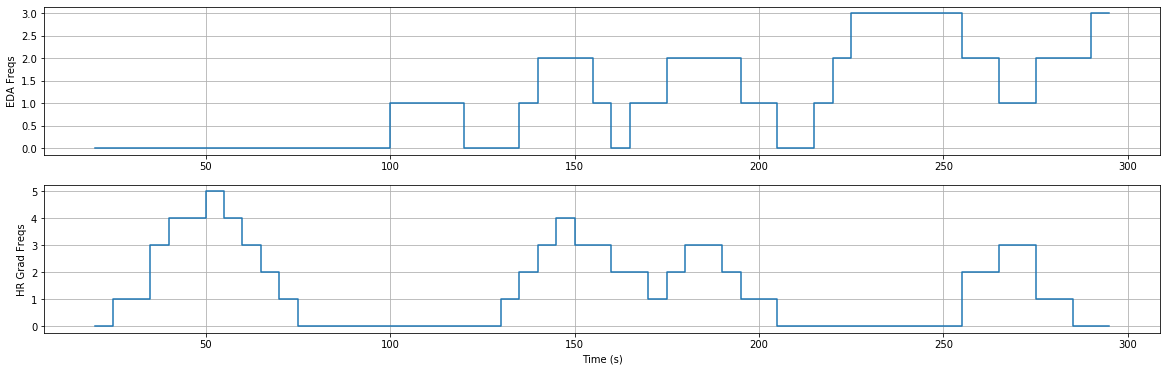

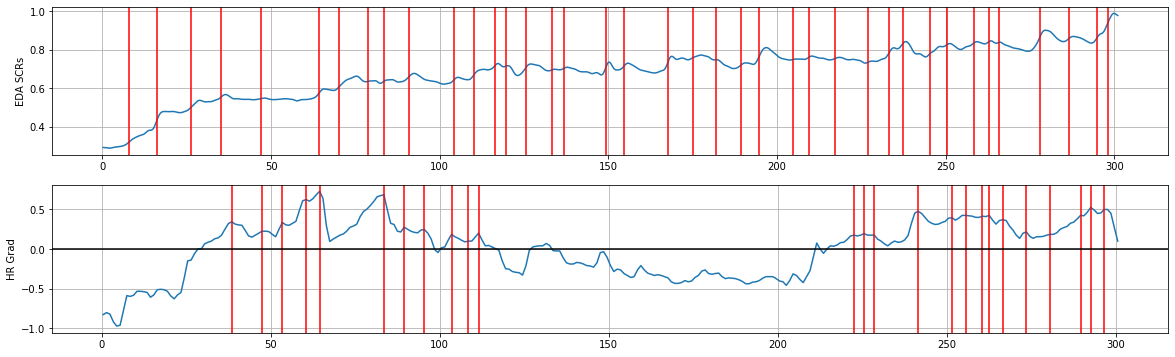

<Figure size 432x288 with 0 Axes>

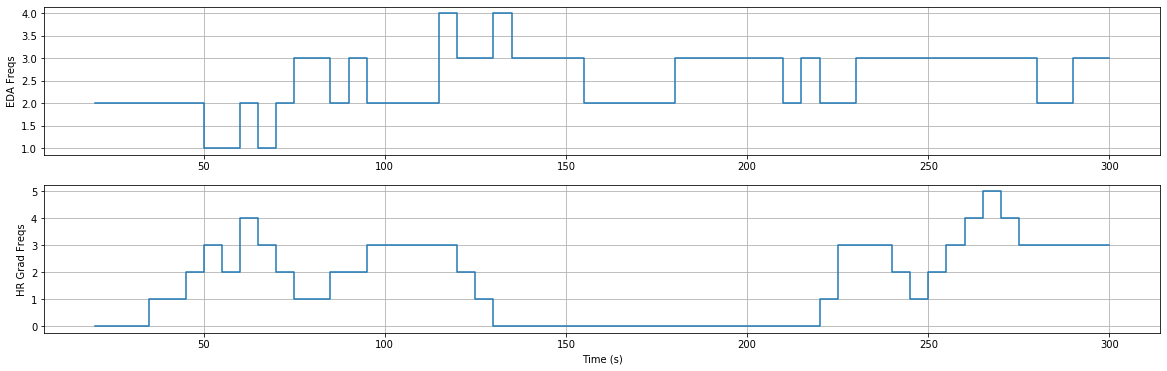

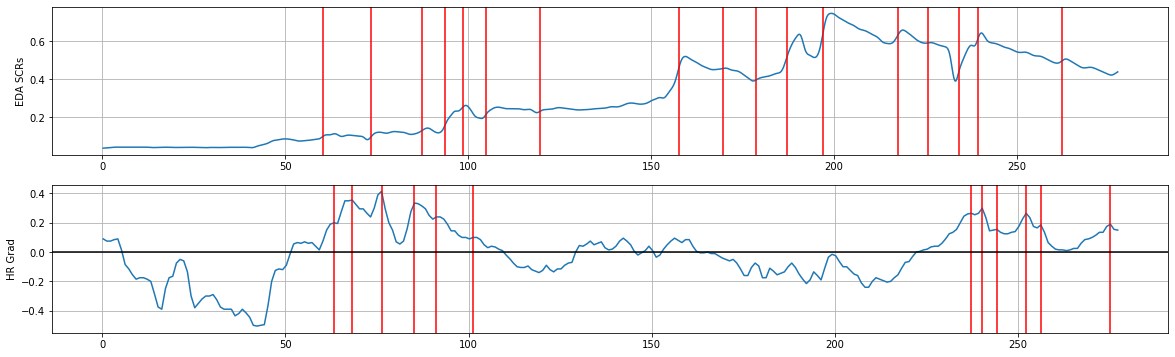

<Figure size 432x288 with 0 Axes>

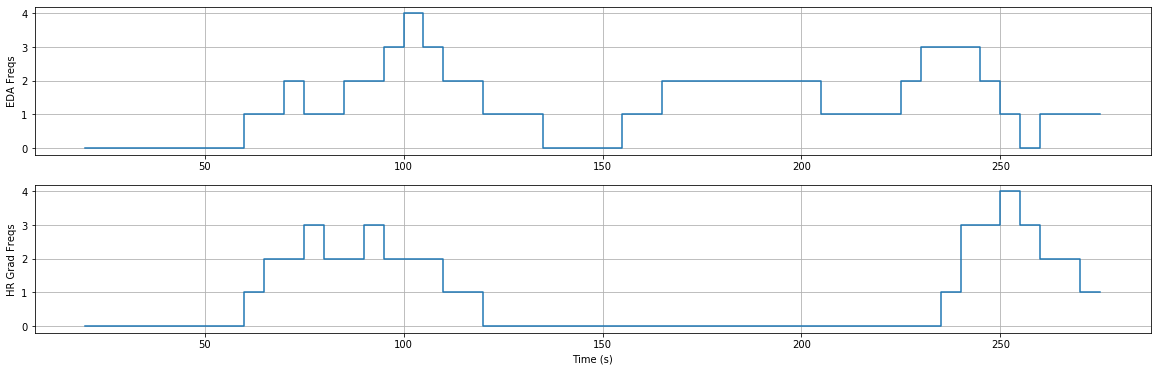

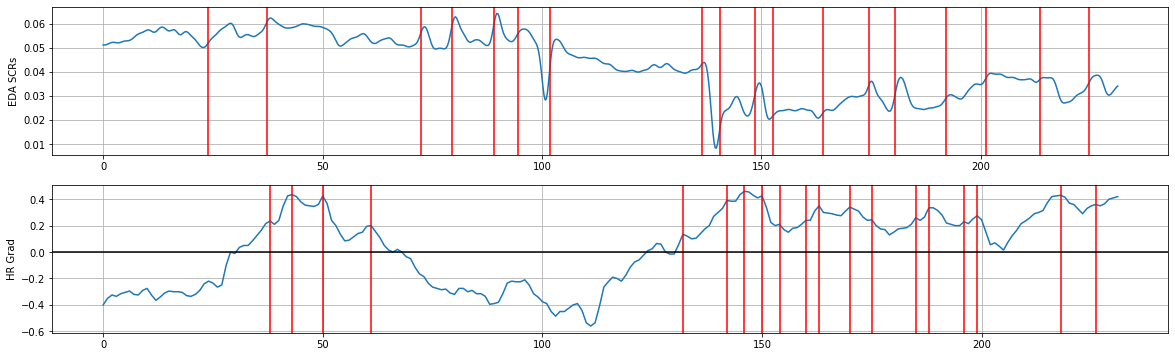

<Figure size 432x288 with 0 Axes>

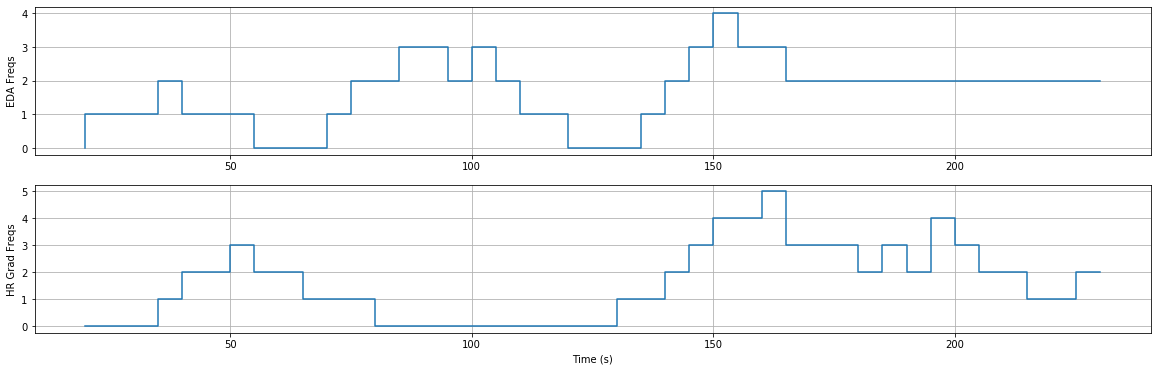

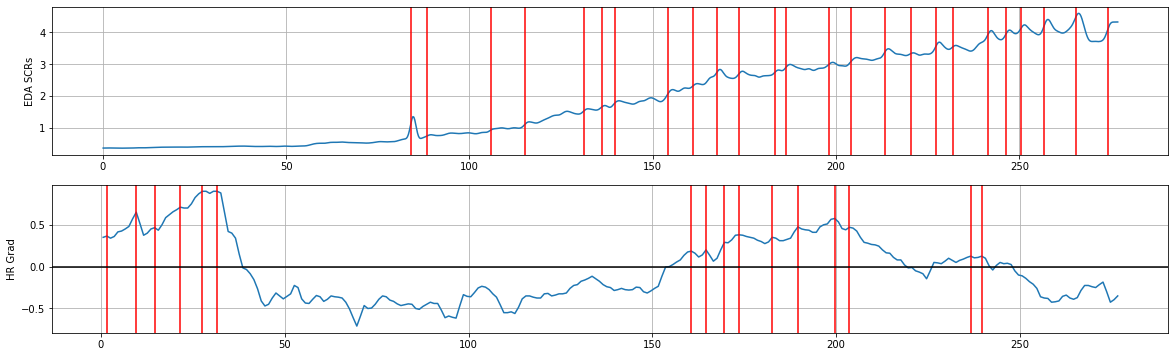

<Figure size 432x288 with 0 Axes>

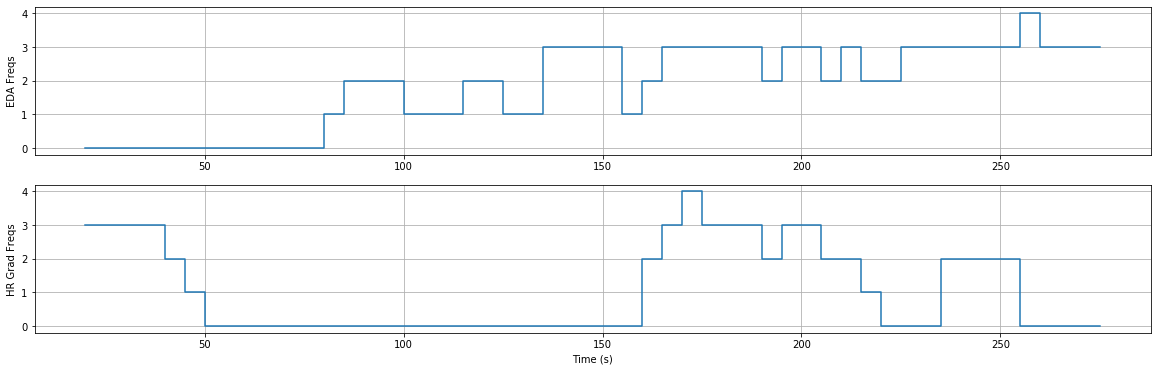

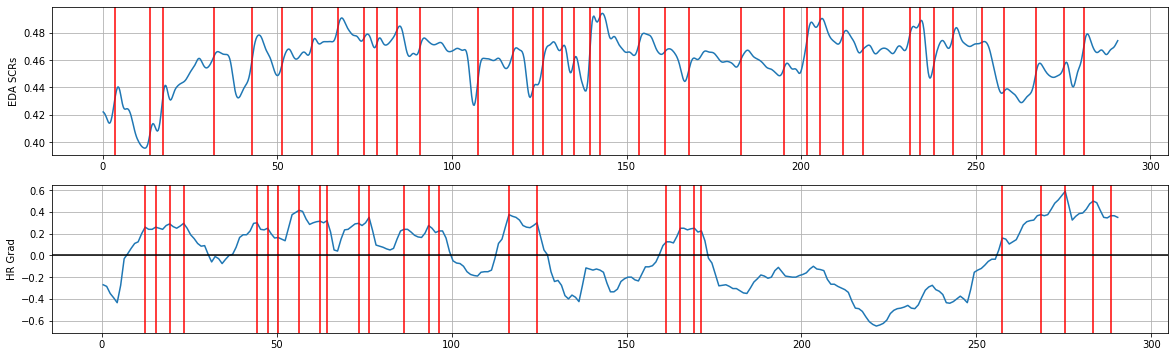

<Figure size 432x288 with 0 Axes>

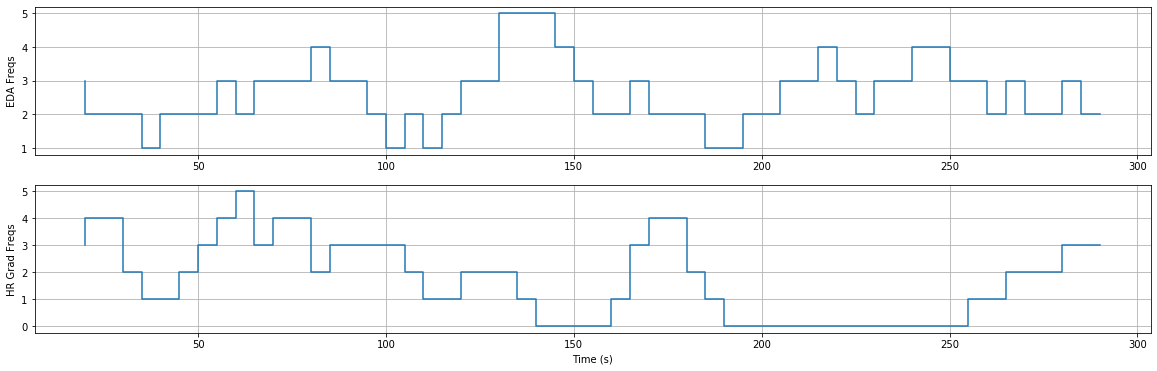

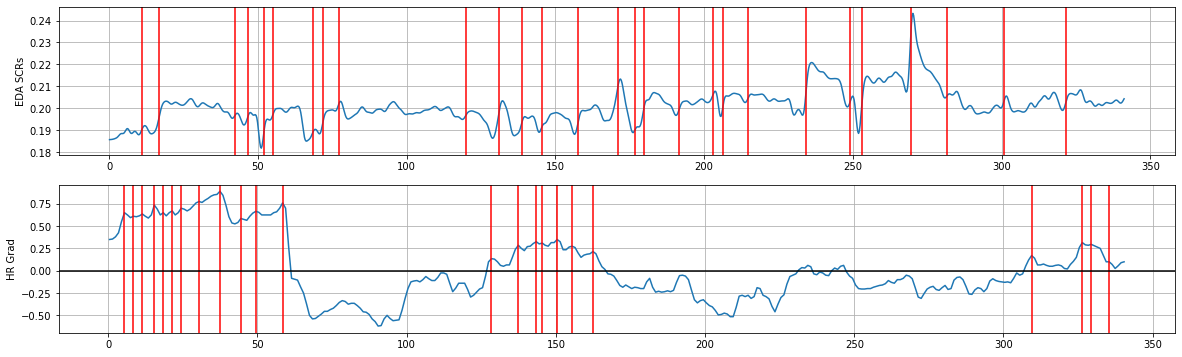

<Figure size 432x288 with 0 Axes>

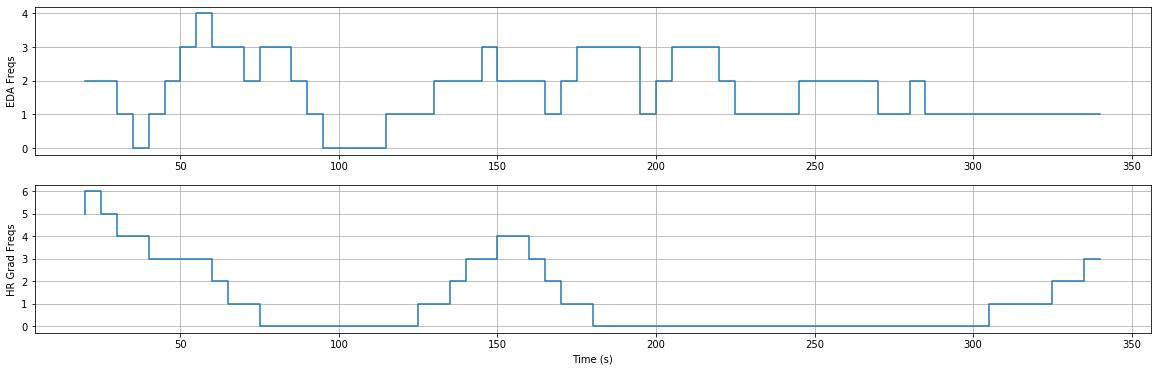

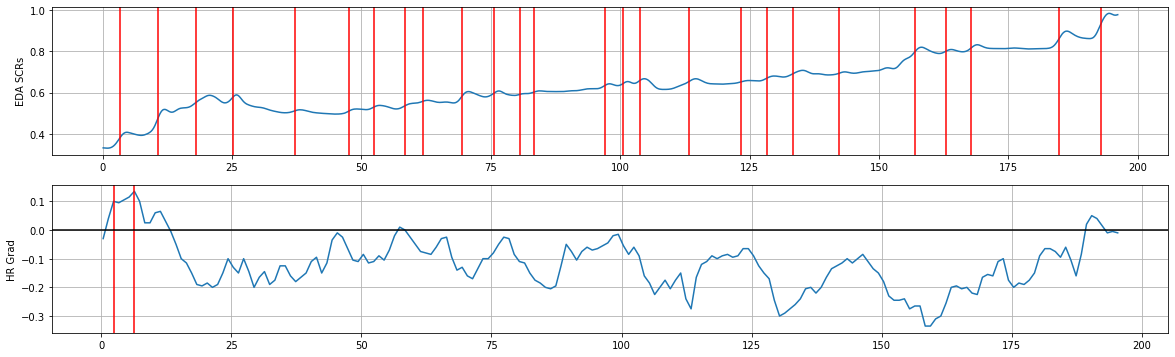

<Figure size 432x288 with 0 Axes>

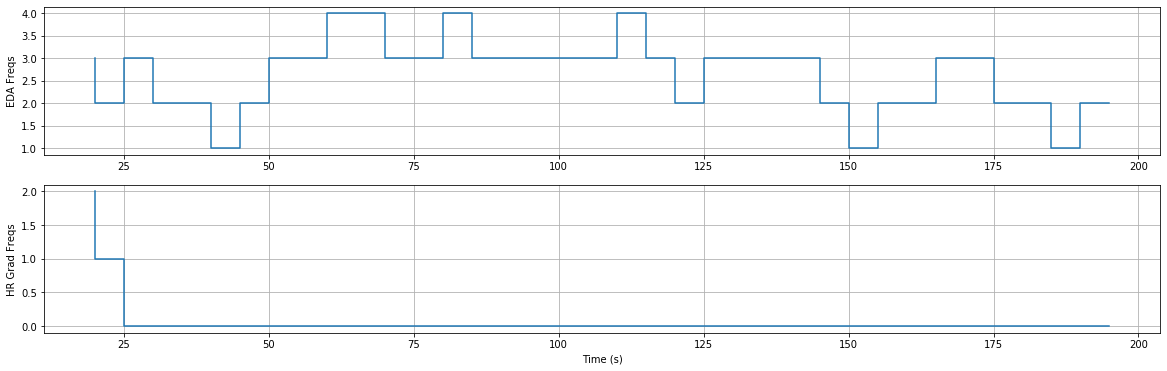

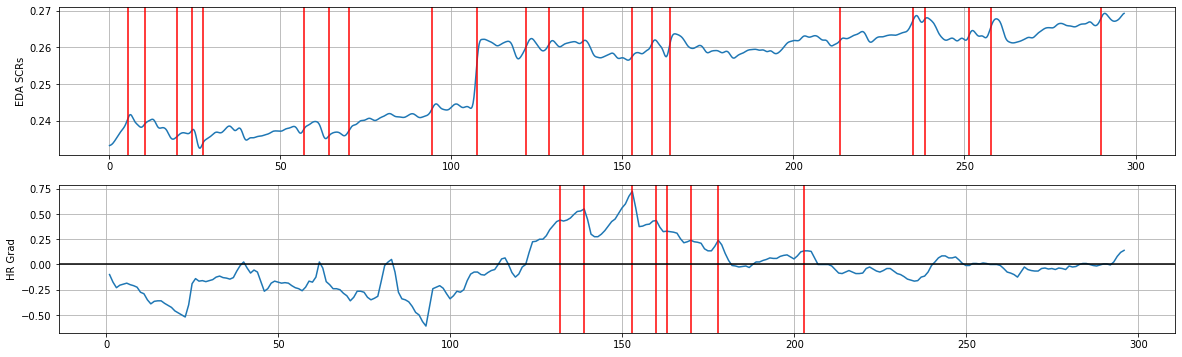

<Figure size 432x288 with 0 Axes>

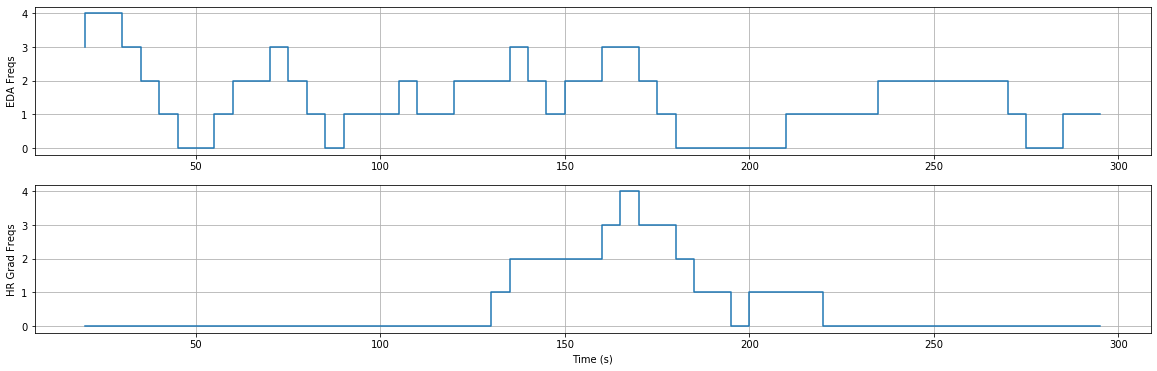

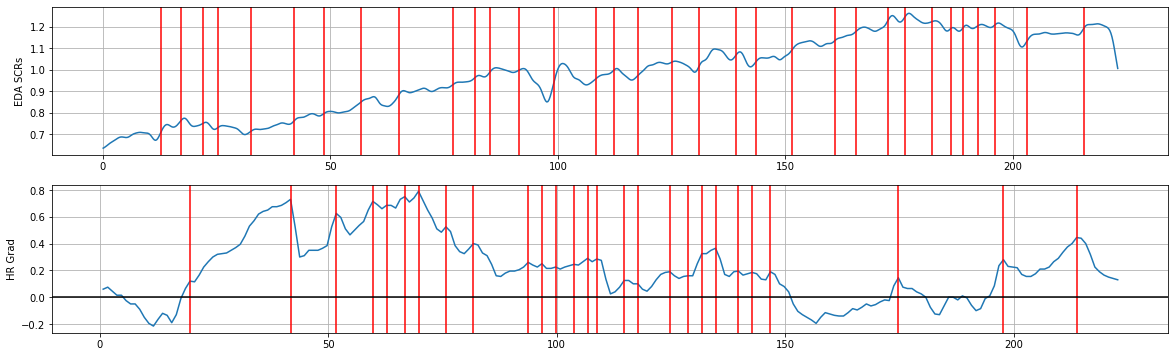

<Figure size 432x288 with 0 Axes>

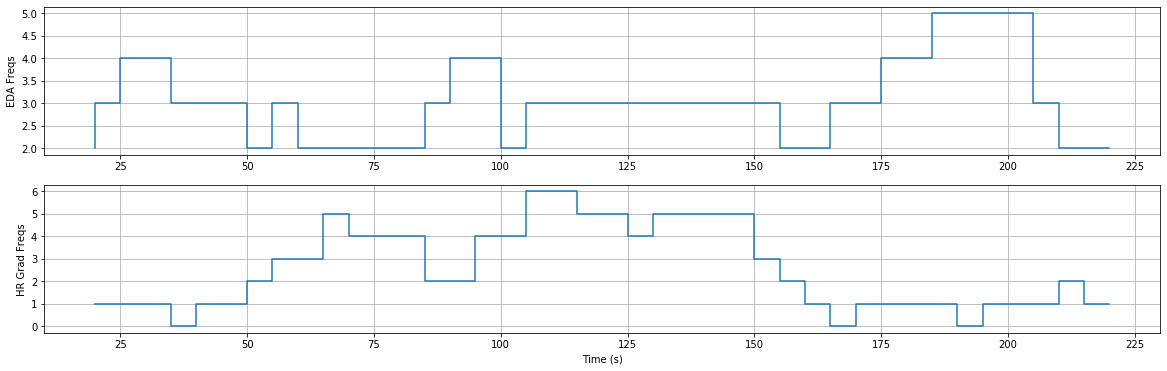

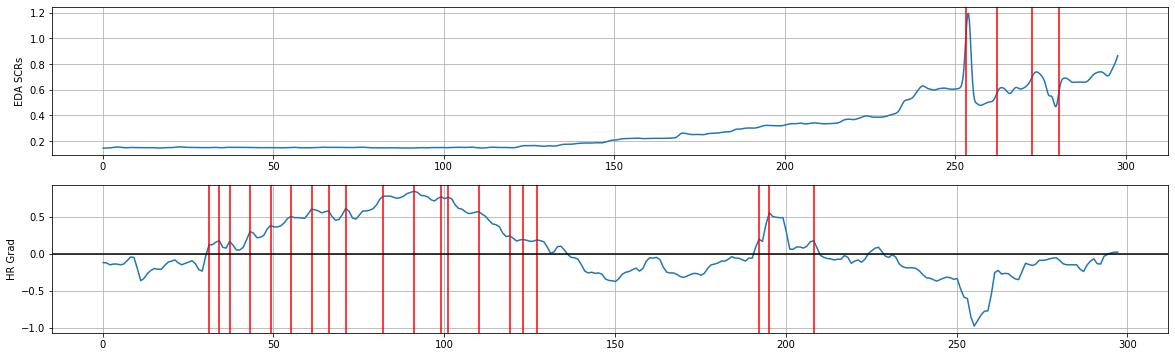

<Figure size 432x288 with 0 Axes>

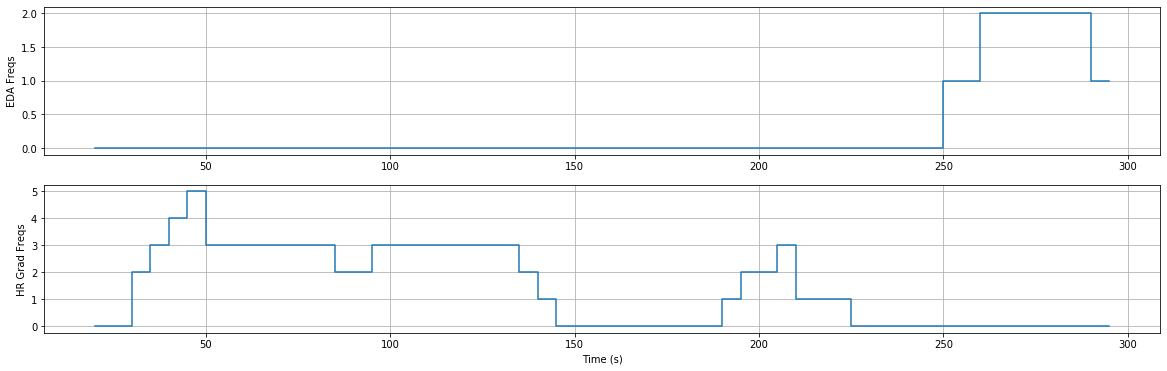

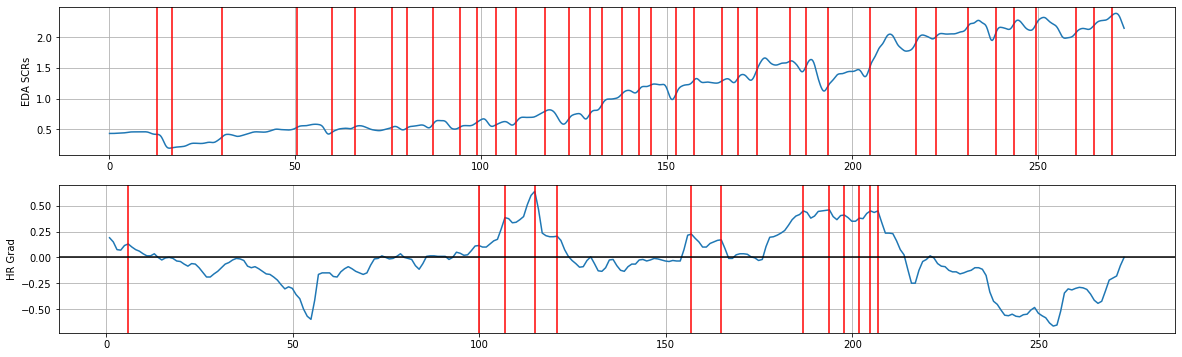

<Figure size 432x288 with 0 Axes>

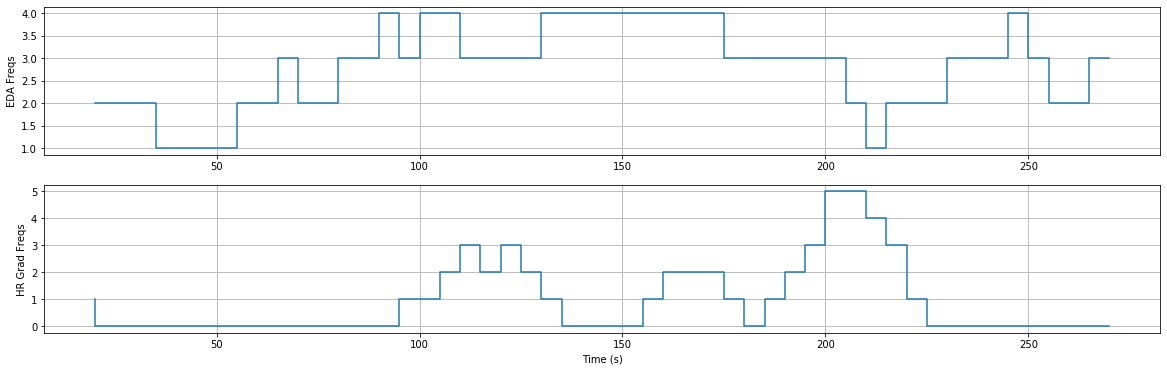

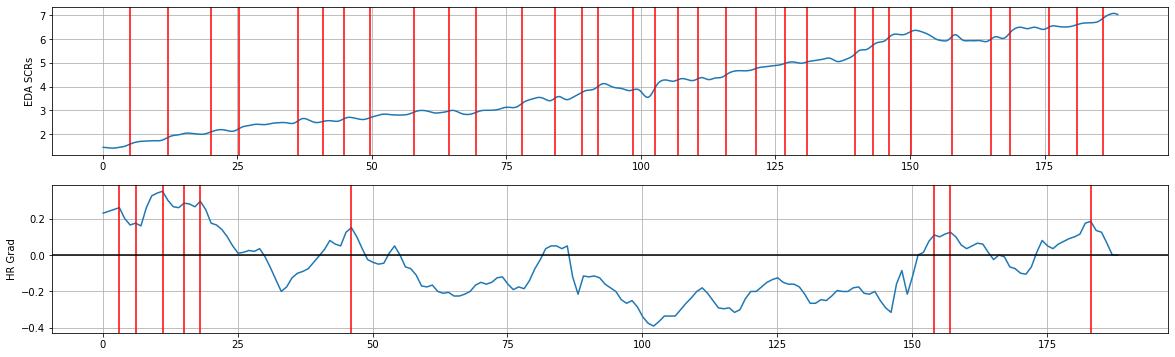

<Figure size 432x288 with 0 Axes>

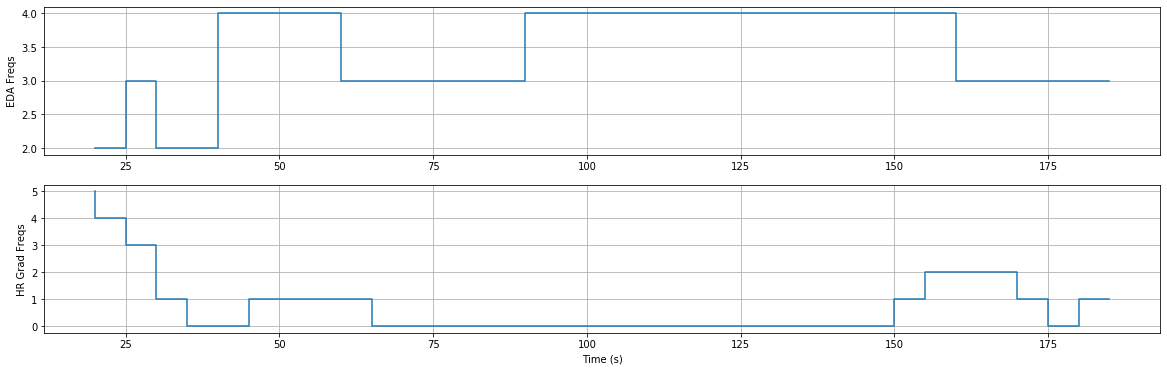

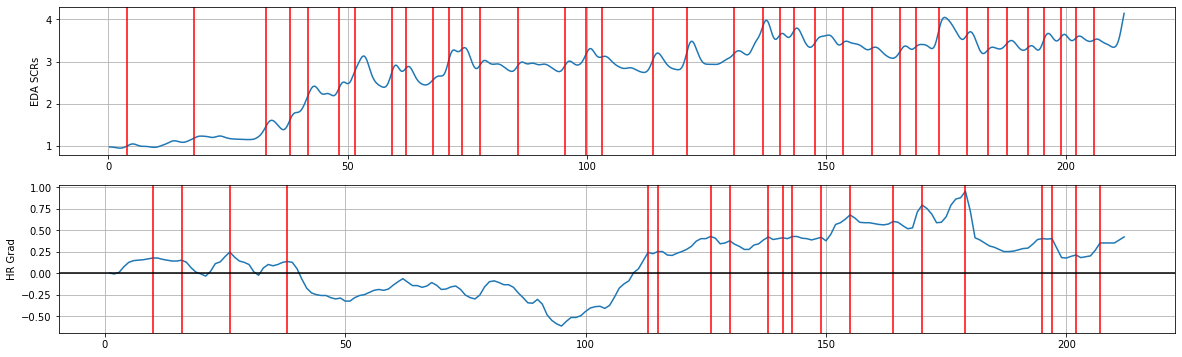

<Figure size 432x288 with 0 Axes>

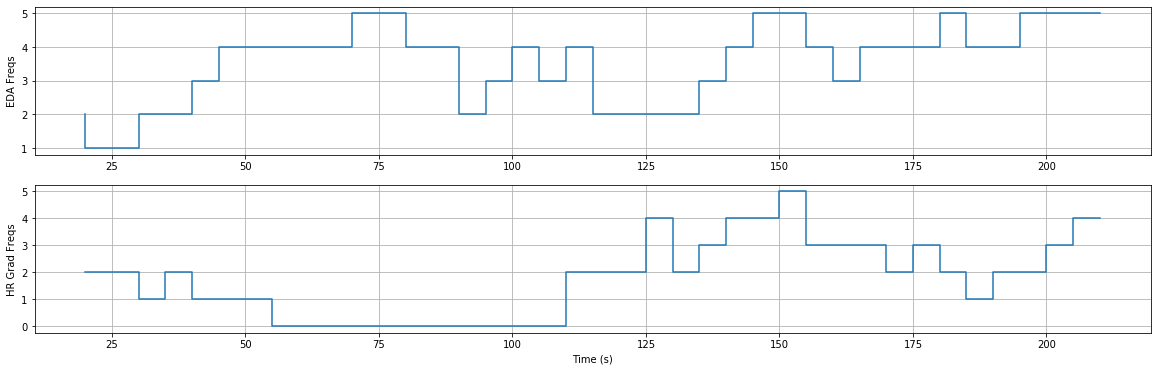

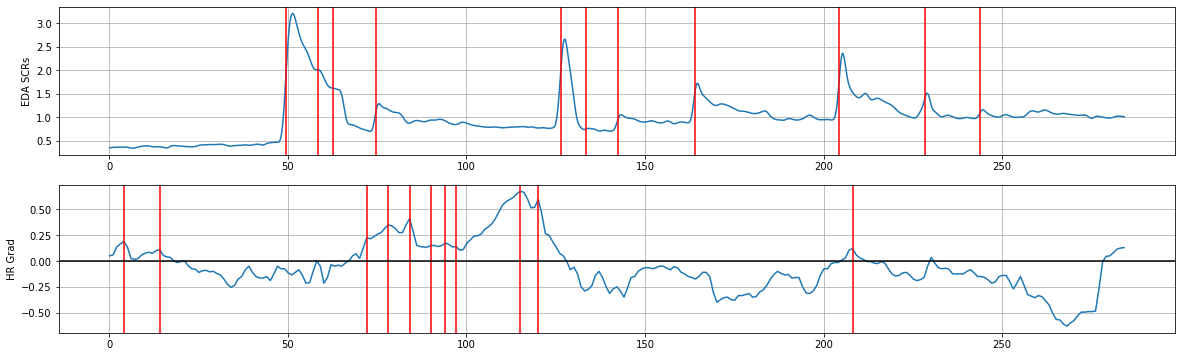

<Figure size 432x288 with 0 Axes>

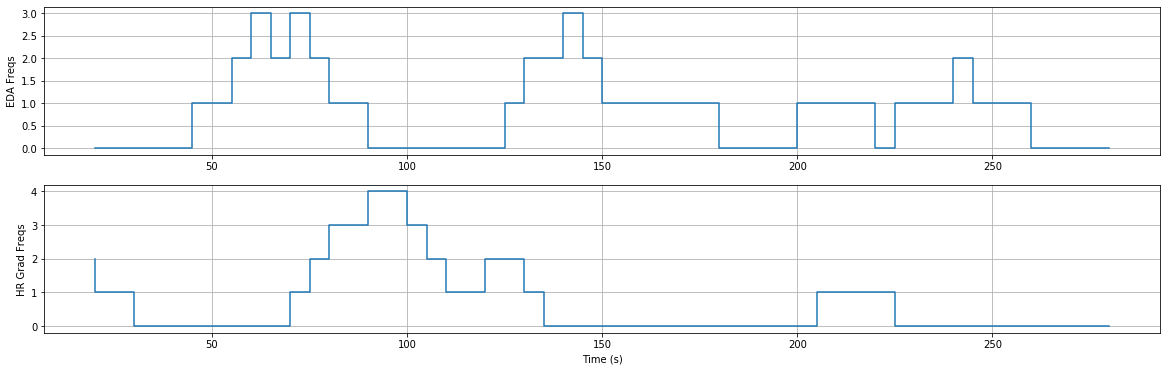

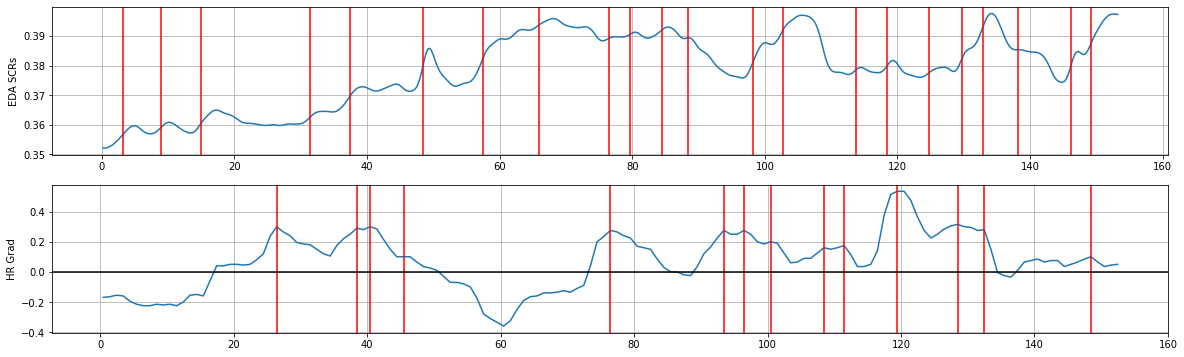

<Figure size 432x288 with 0 Axes>

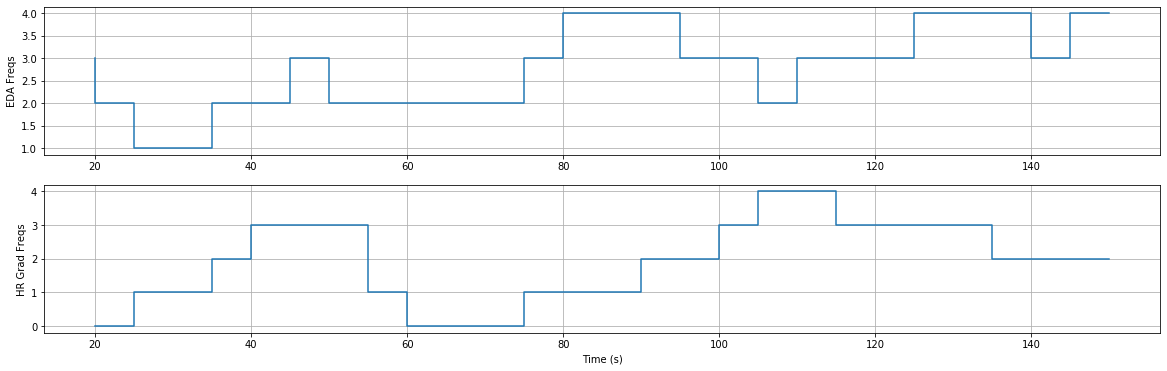

Participant 054 does not have baselines
Participant 055 does not have baselines


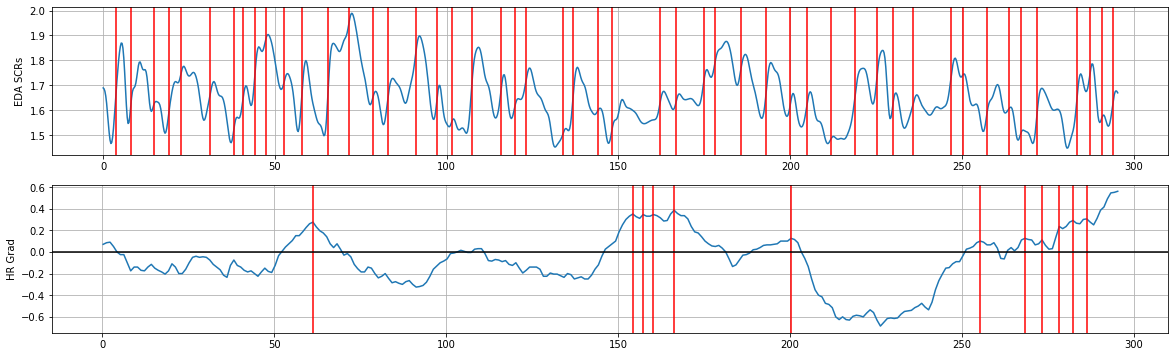

<Figure size 432x288 with 0 Axes>

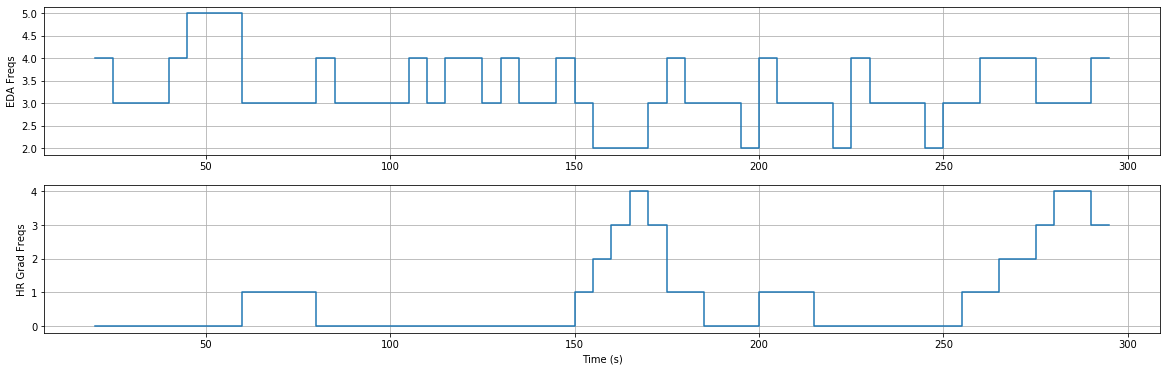

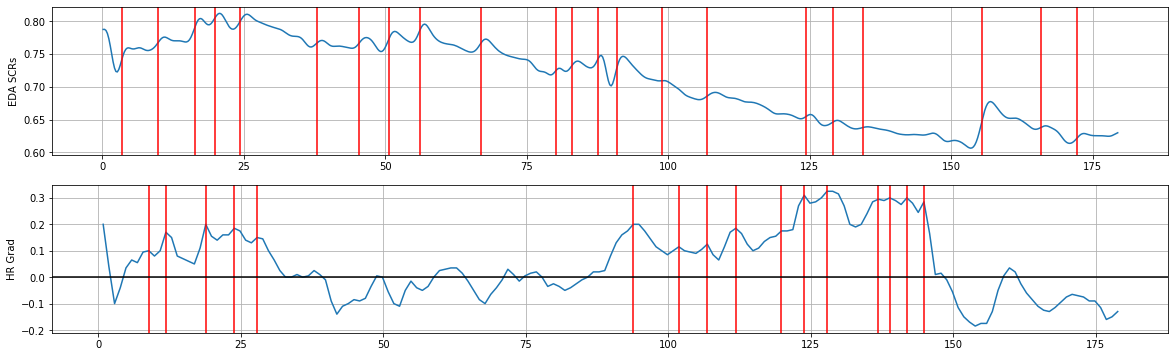

<Figure size 432x288 with 0 Axes>

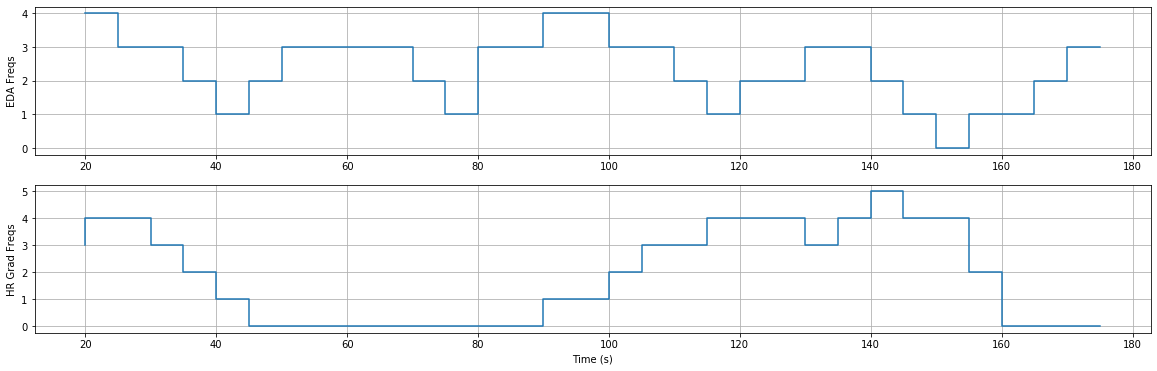

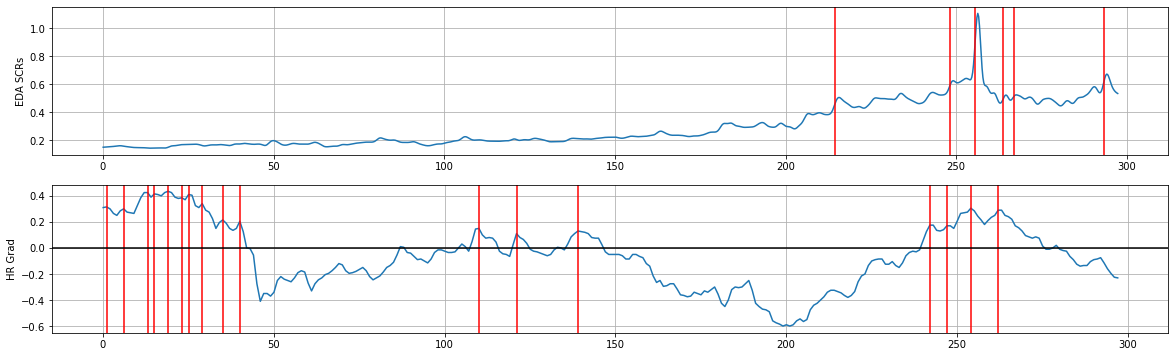

<Figure size 432x288 with 0 Axes>

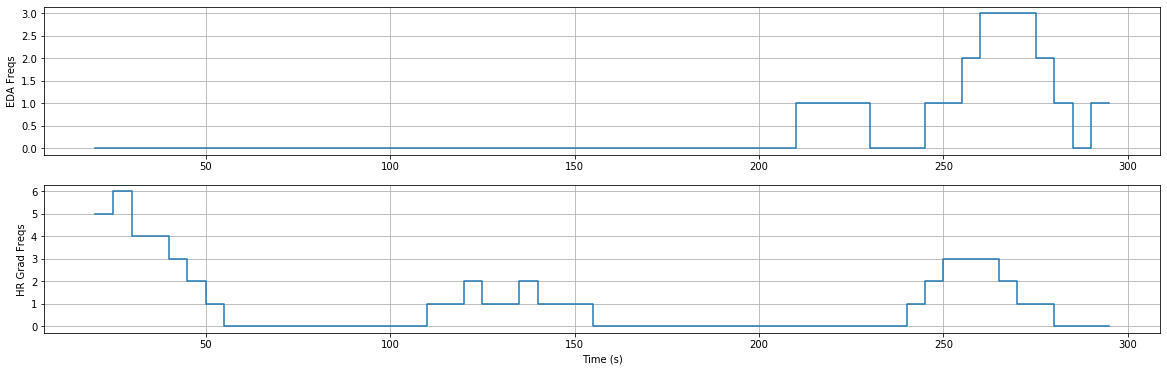

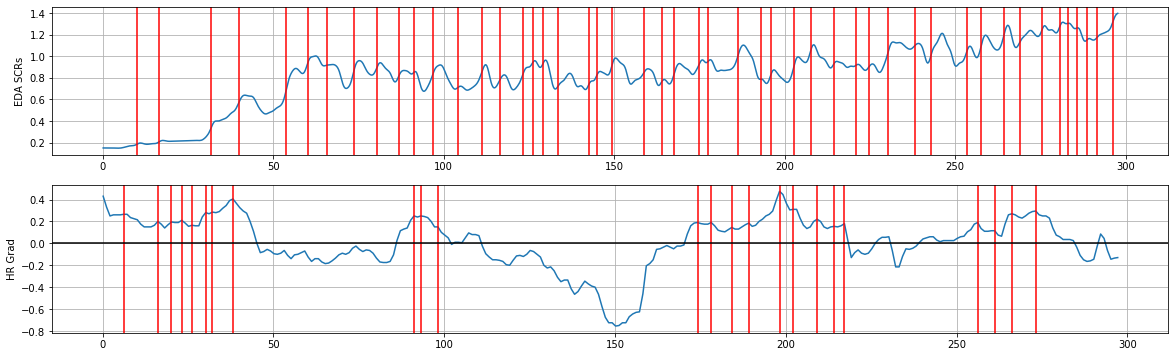

<Figure size 432x288 with 0 Axes>

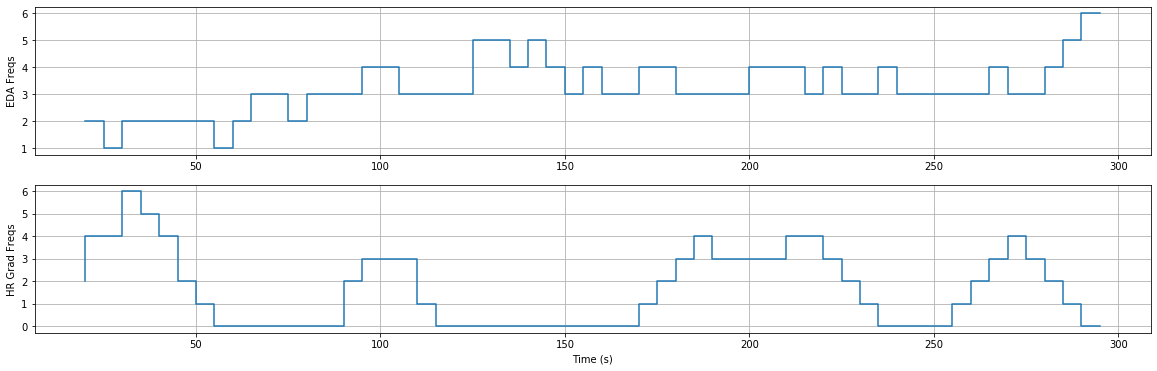

Participant 059 does not have baselines


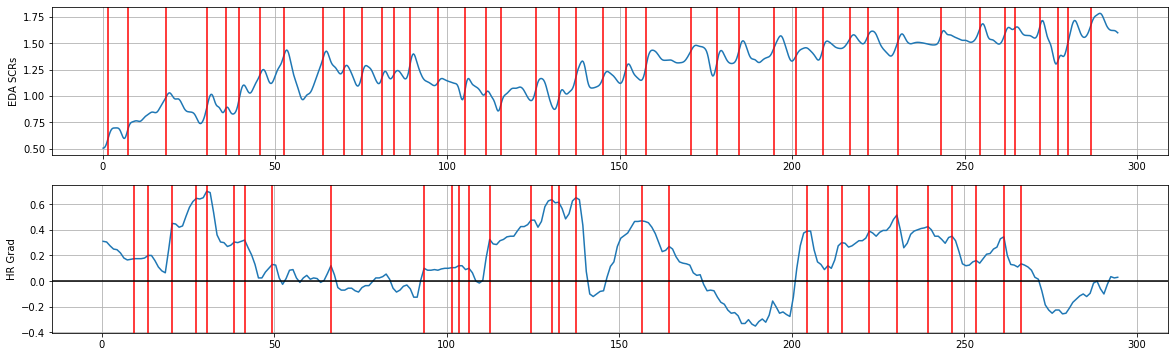

<Figure size 432x288 with 0 Axes>

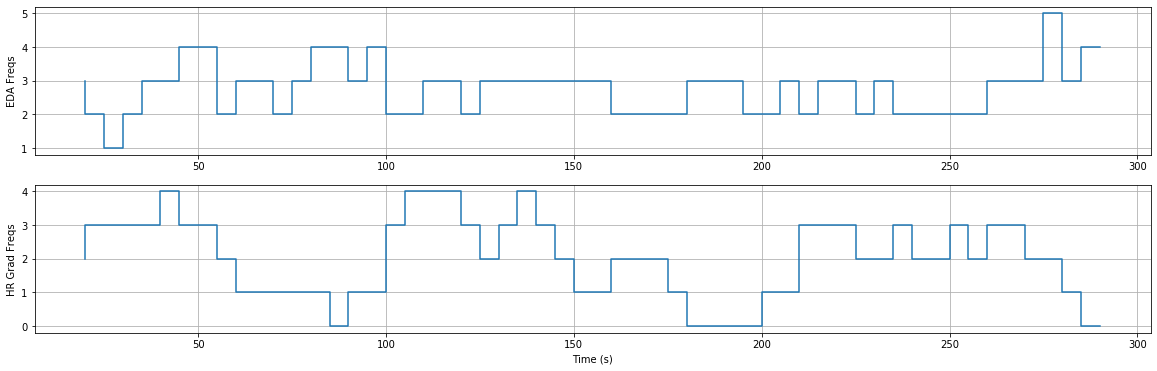

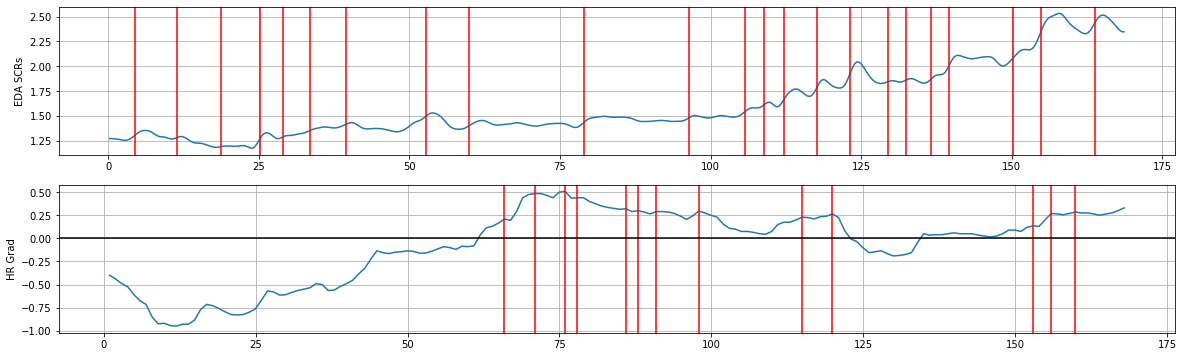

<Figure size 432x288 with 0 Axes>

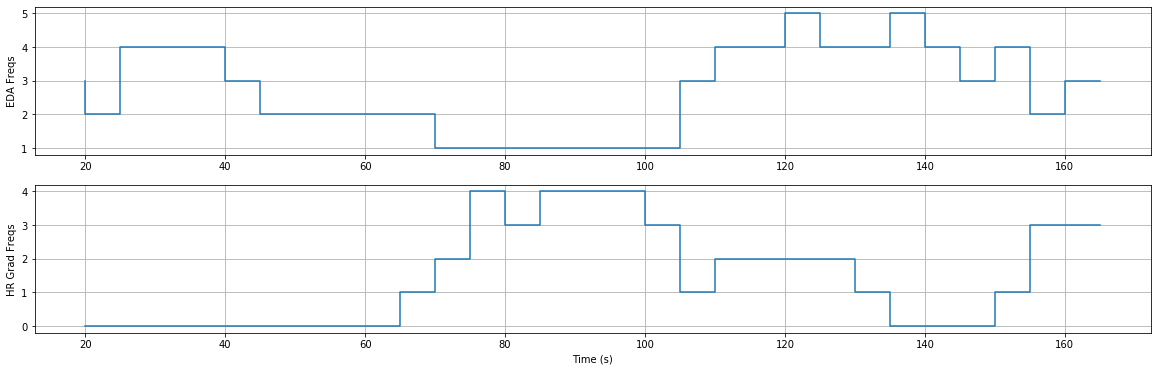

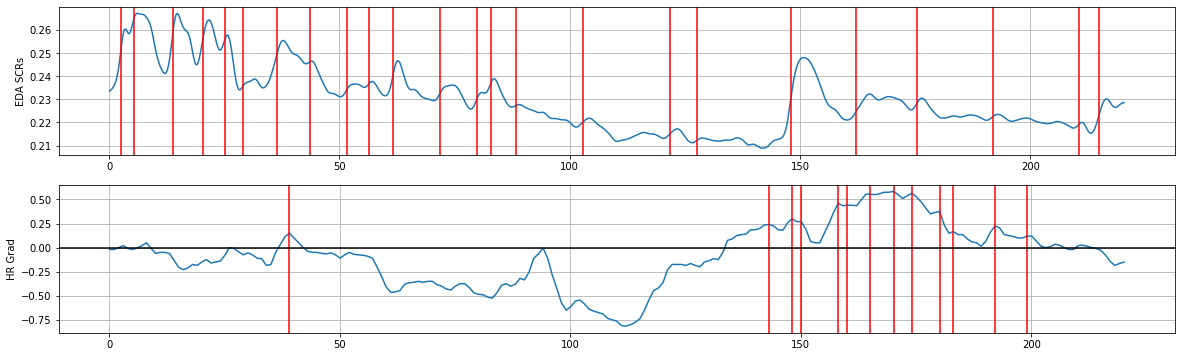

<Figure size 432x288 with 0 Axes>

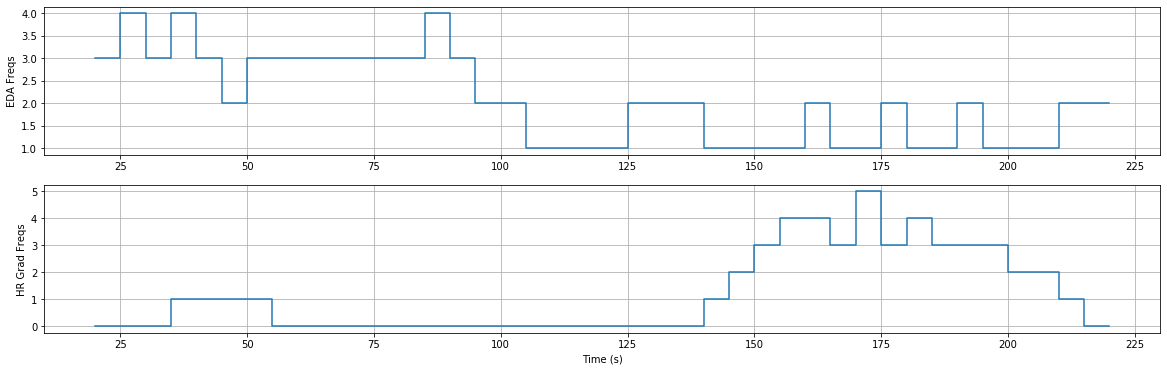

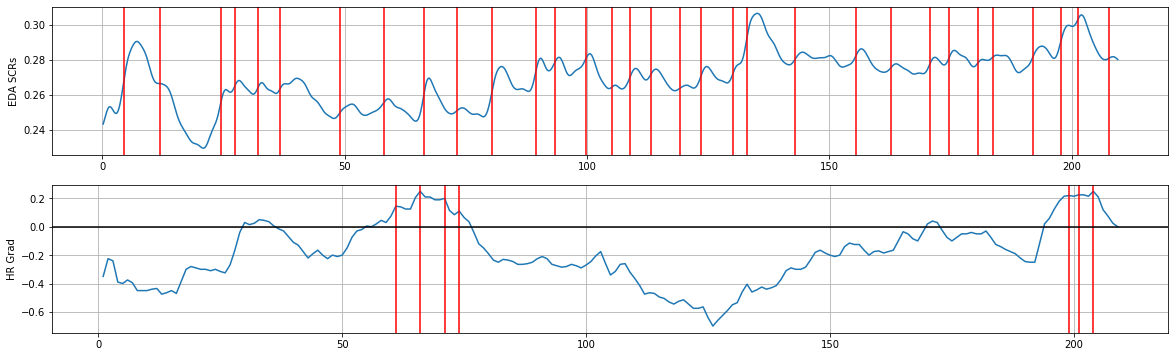

<Figure size 432x288 with 0 Axes>

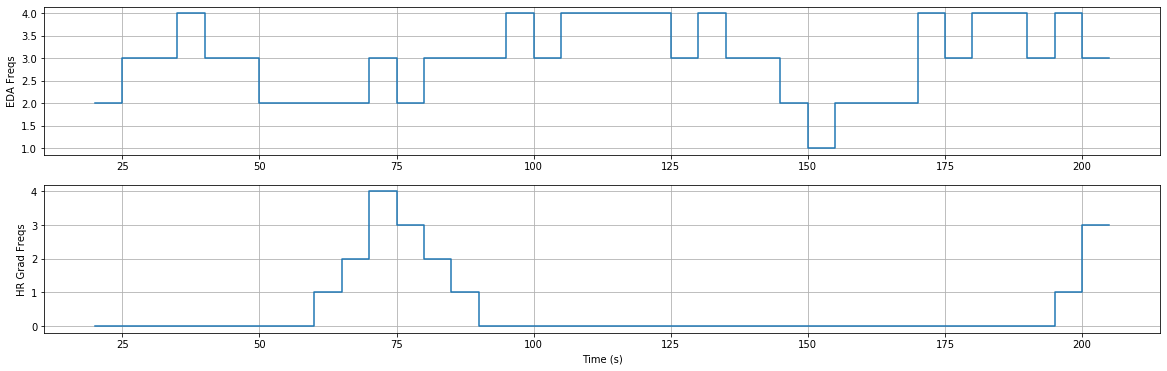

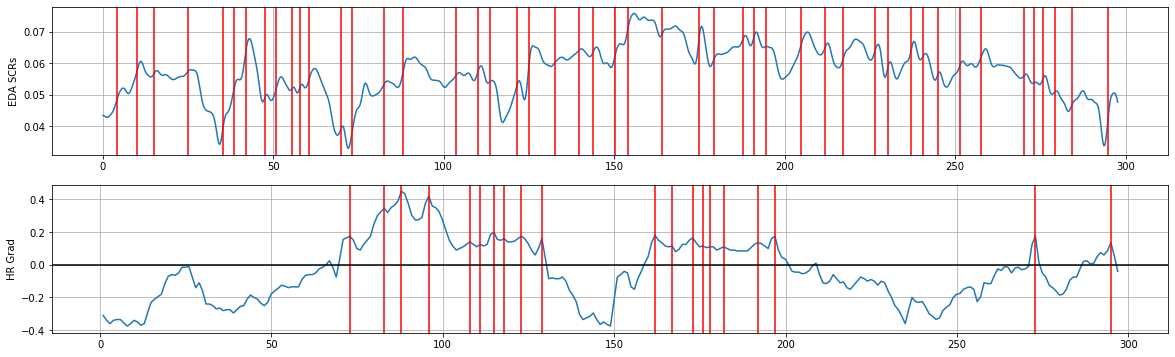

<Figure size 432x288 with 0 Axes>

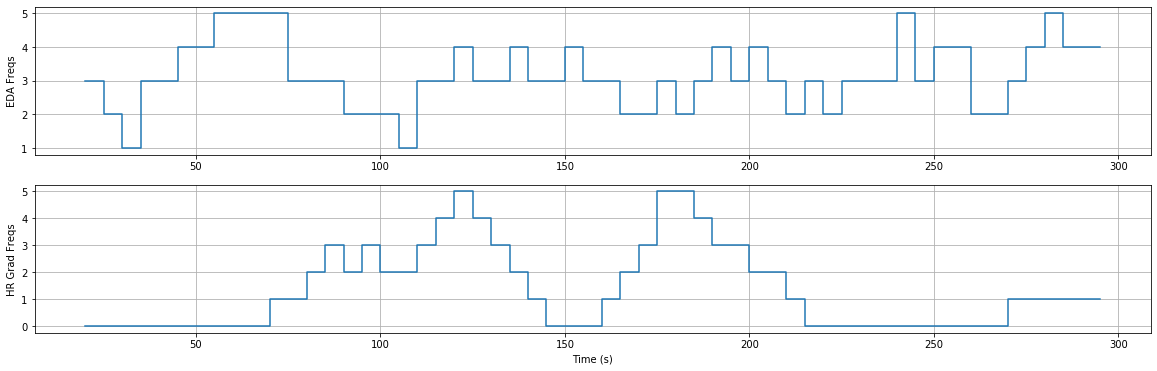

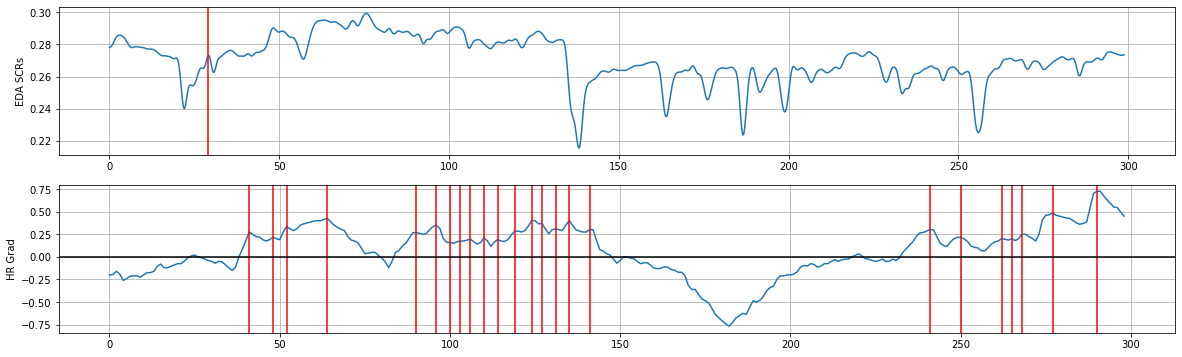

<Figure size 432x288 with 0 Axes>

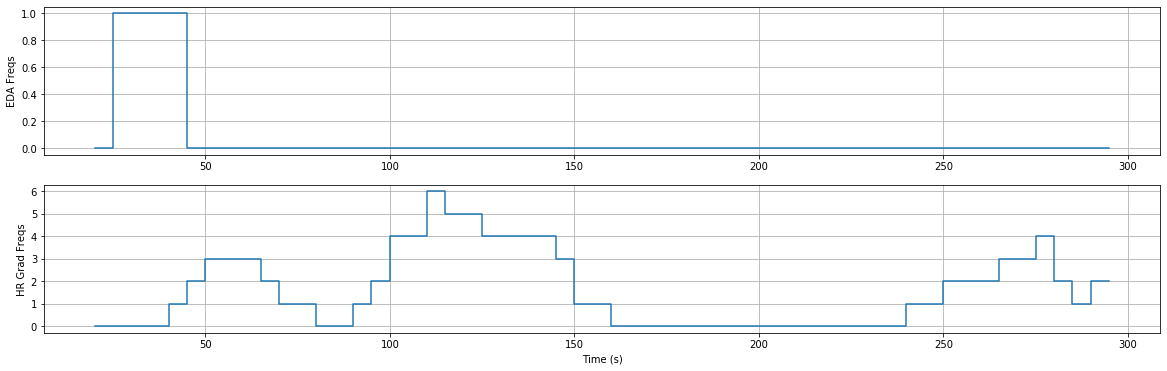

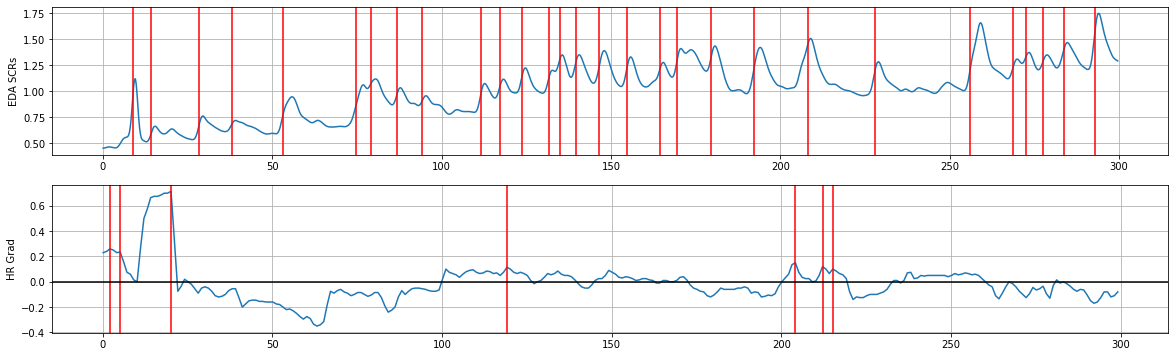

<Figure size 432x288 with 0 Axes>

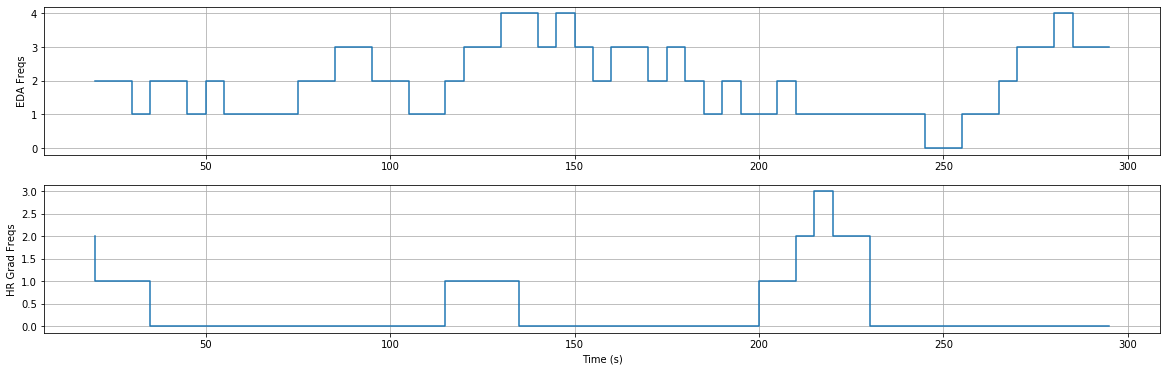

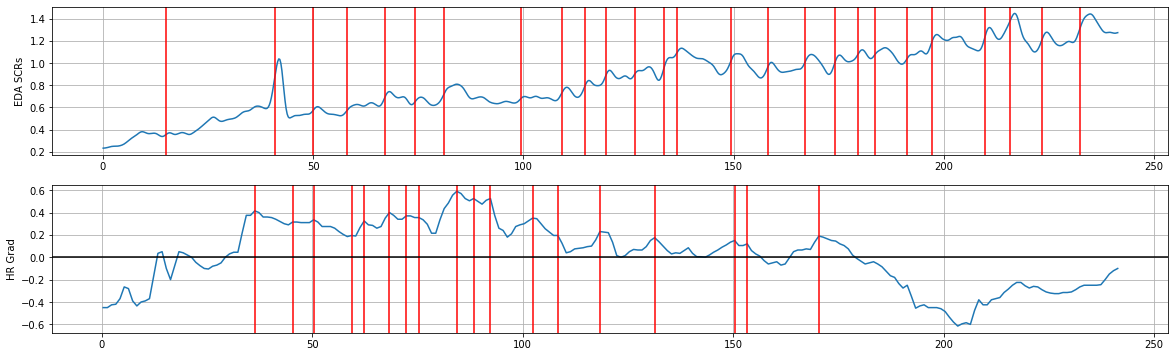

<Figure size 432x288 with 0 Axes>

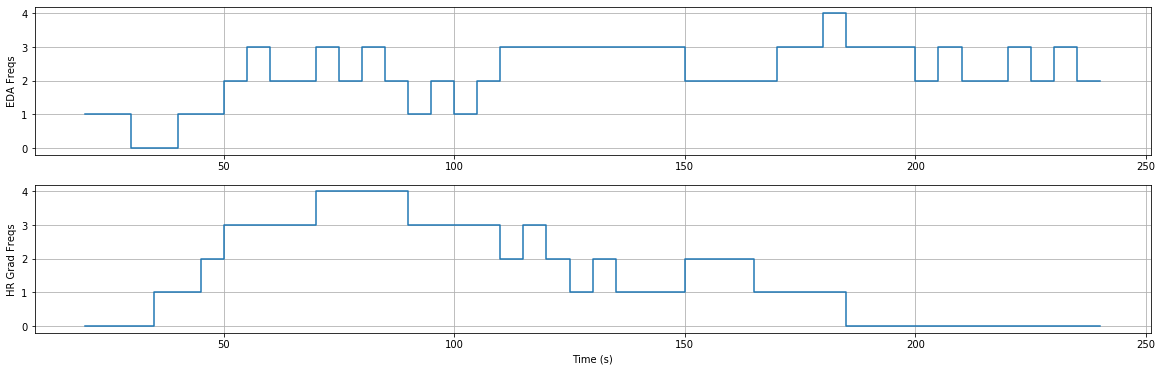

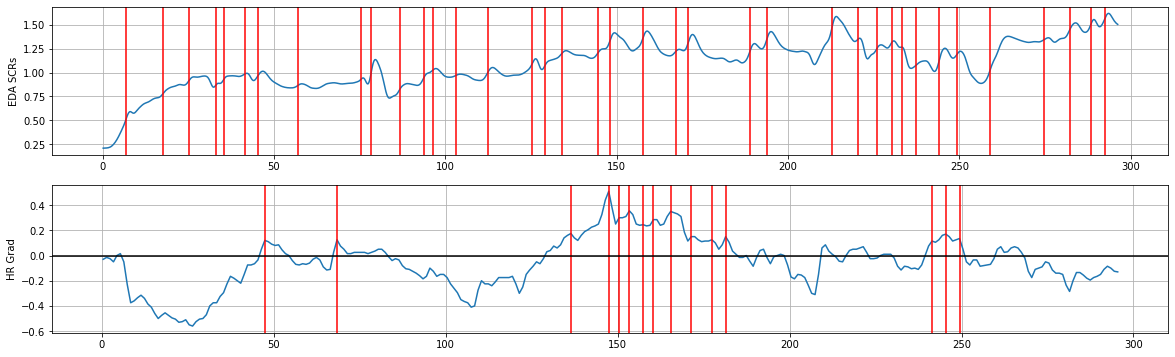

<Figure size 432x288 with 0 Axes>

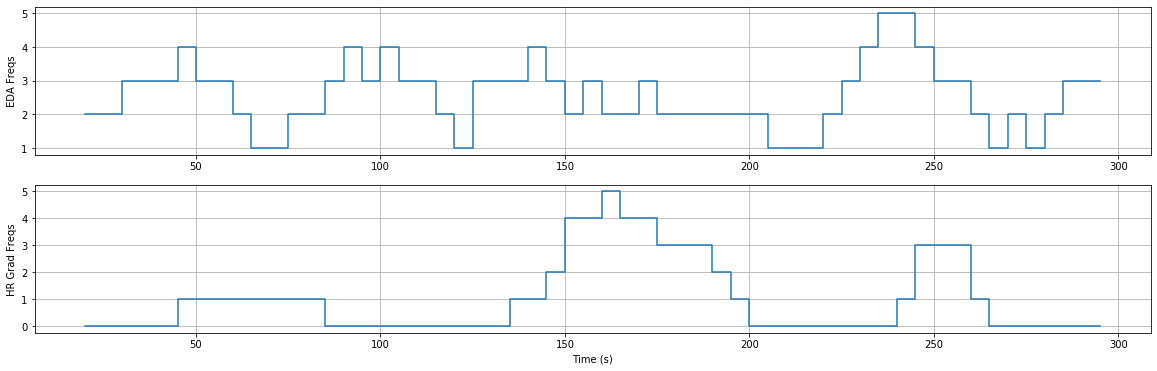

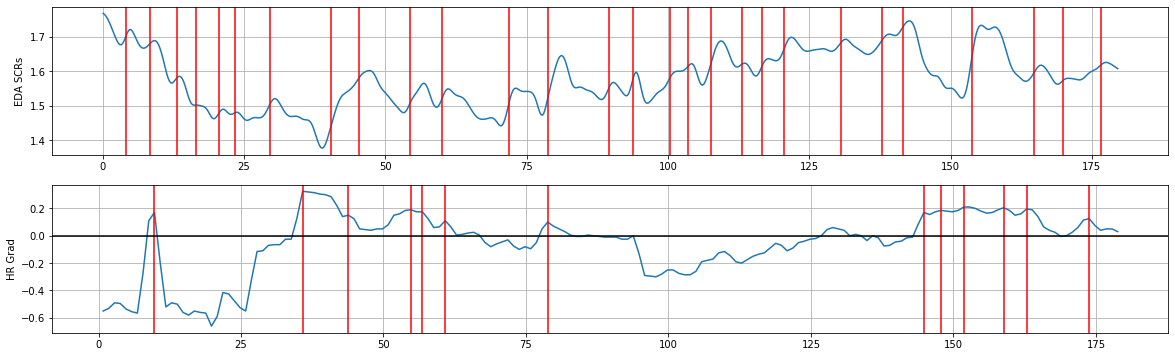

<Figure size 432x288 with 0 Axes>

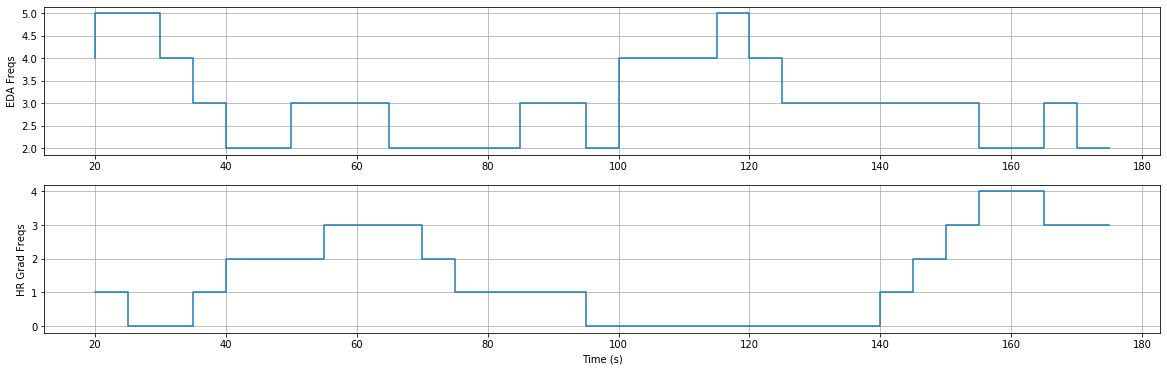

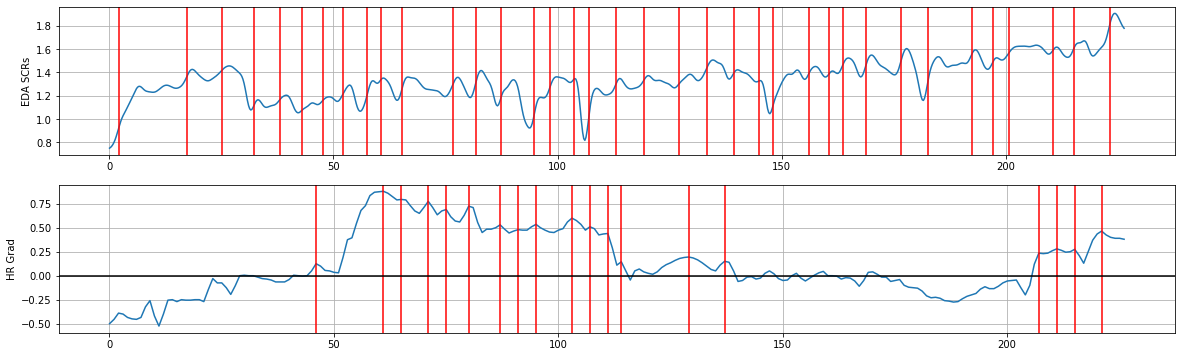

<Figure size 432x288 with 0 Axes>

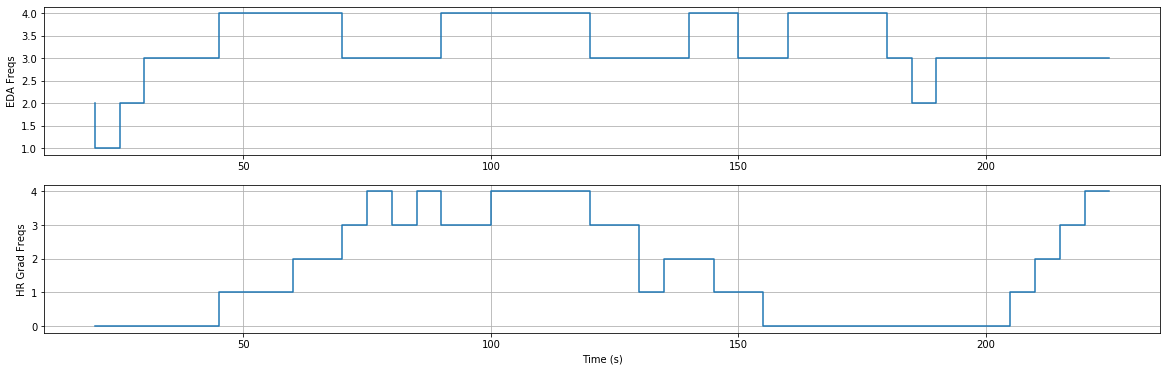

Participant 069 does not have baselines
Participant 070 does not have baselines


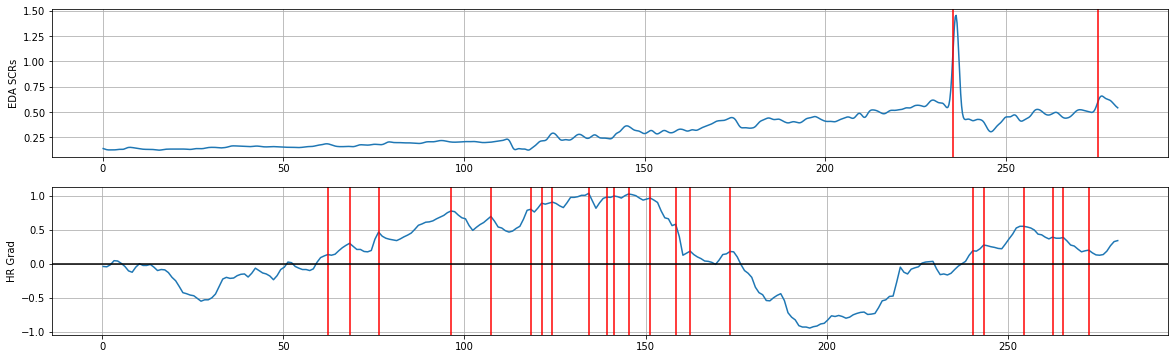

<Figure size 432x288 with 0 Axes>

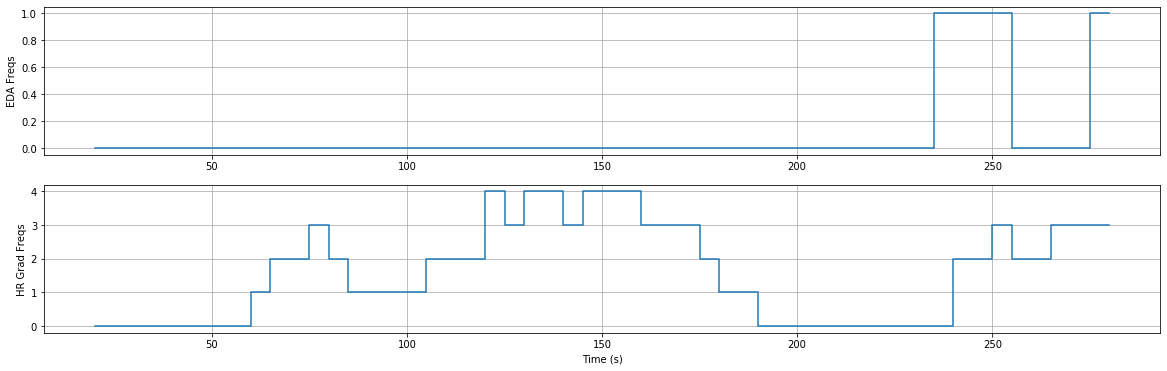

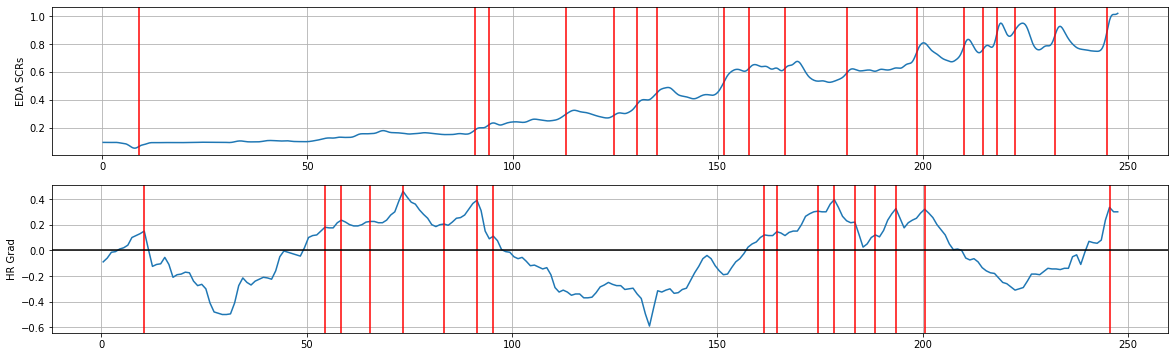

<Figure size 432x288 with 0 Axes>

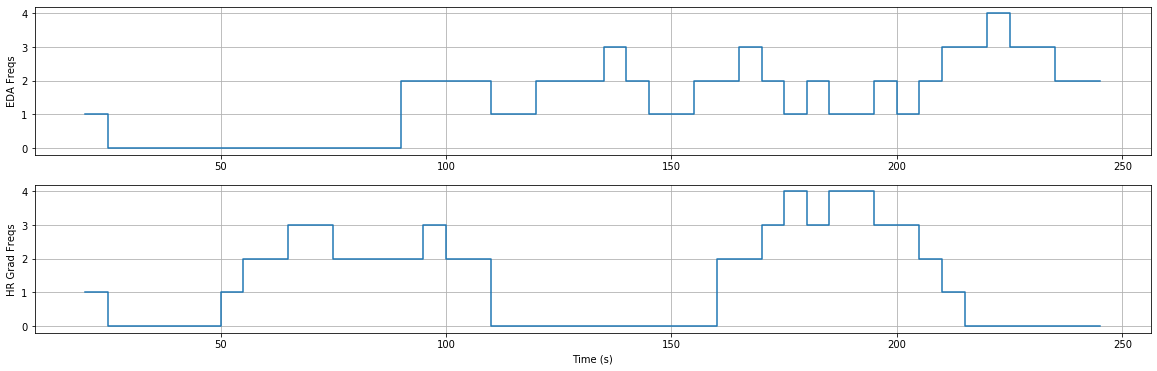

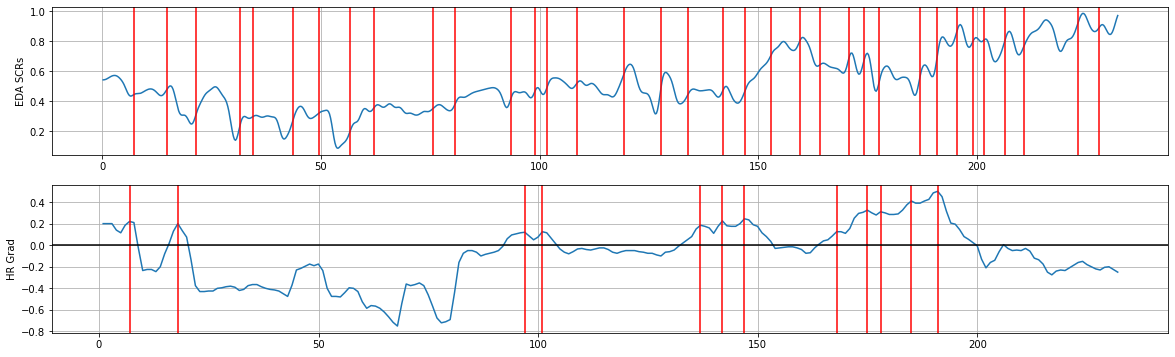

<Figure size 432x288 with 0 Axes>

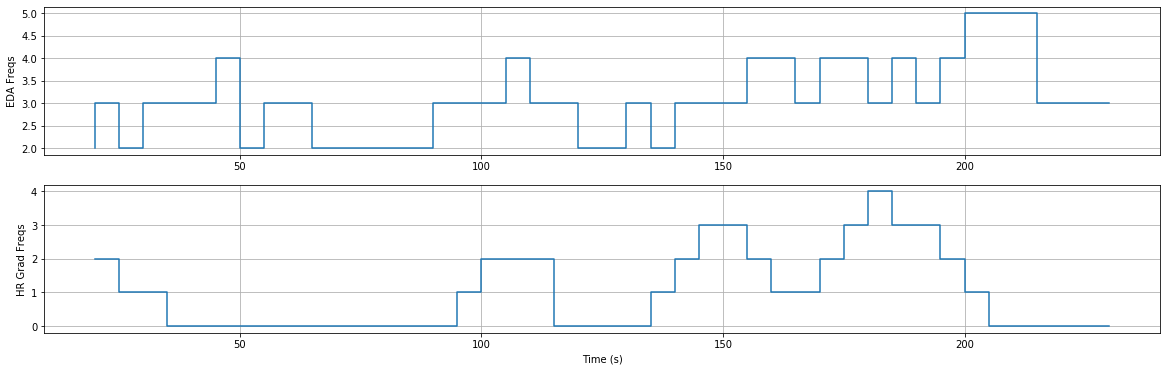

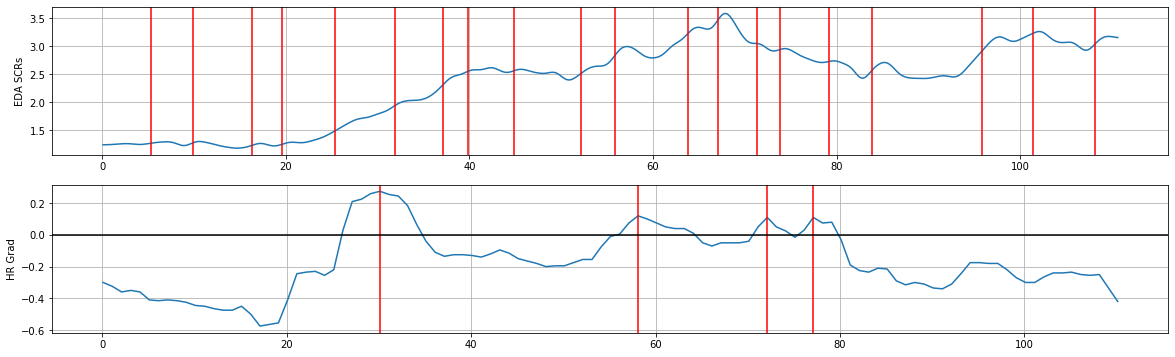

<Figure size 432x288 with 0 Axes>

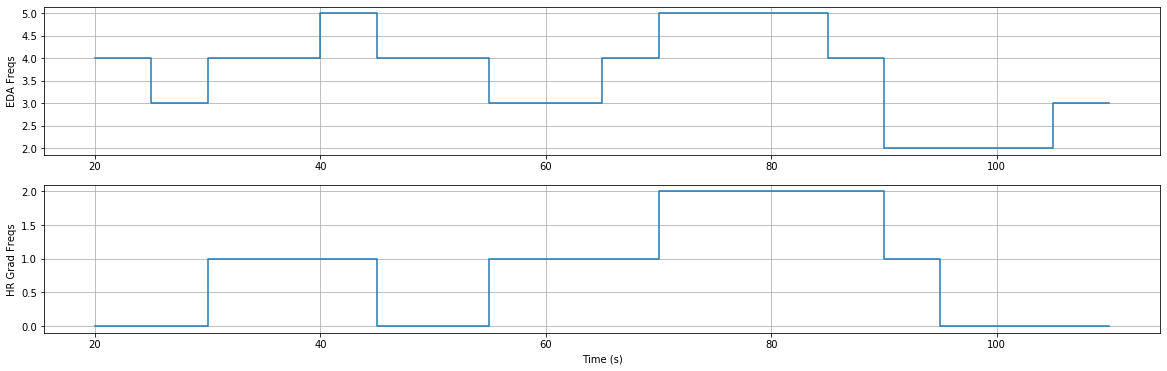

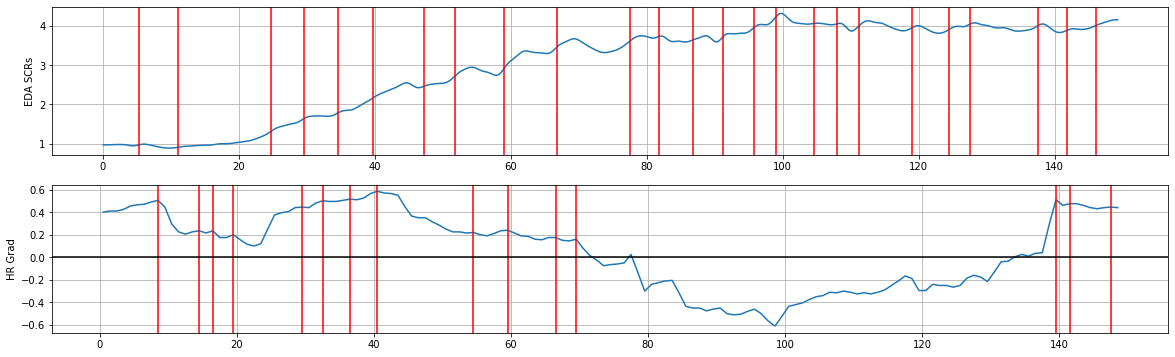

<Figure size 432x288 with 0 Axes>

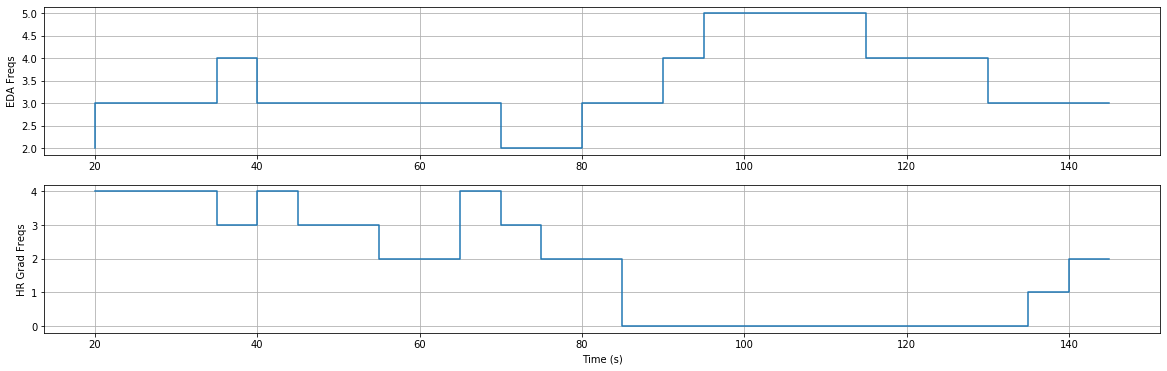

In [17]:
for pt in pts:

    base_path = f'data/raw_data/P{pt:03d}/'

    eda_relax_path = os.path.join(base_path, 'PRE/E4_EDA_RELAX.xlsx')
    eda_prep_path = os.path.join(base_path, 'PRE/E4_EDA_PREP.xlsx')

    try:

        eda_relax_df = pd.read_excel(eda_relax_path, engine='openpyxl')
        eda_prep_df = pd.read_excel(eda_prep_path, engine='openpyxl')

        eda_relax_avg = eda_relax_df['EDA'].mean()
        eda_prep_avg = eda_prep_df['EDA'].mean()

    except IOError:
        print(f'Participant {pt:03d} does not have baselines')
        continue

    for session in ['PRE', 'POST']:

        session_path = os.path.join(base_path, session)
        eda_path = os.path.join(session_path, 'E4_EDA_PPT.xlsx')
        hr_path = os.path.join(session_path, 'E4_HR_PPT.xlsx')
        annotation_path = os.path.join(session_path, 'annotation.xlsx')
        

        try:
            annotation_df = pd.read_excel(annotation_path, engine='openpyxl')

            annotations_r1 = annotation_df['R1'].to_numpy()
            annotations_r2 = annotation_df['R2'].to_numpy()
            
            annotations_r1 = median_filter(annotations_r1, size=10)
            annotations_r2 = median_filter(annotations_r2, size=10)

            annotation_times = annotation_df['Time (s)'].to_numpy()
        except IOError:
            continue

        try:

            eda_df = pd.read_excel(eda_path, engine='openpyxl')         

            eda_times = eda_df['Time (s)'].to_numpy()
            original_eda = eda_df['EDA'].to_numpy()
            eda_signal = eda_df['EDA'].to_numpy()
            
            # Filter EDA with NK
            sr = 4
            order = 4
            w0 = 1.5 # Cutoff frequency 
            w0 = 2 * np.array(w0) / sr 

            eda_signal = nk.signal_sanitize(eda_signal)
            b, a = scipy.signal.butter(N=order, Wn=w0, btype='lowpass', analog=False, output='ba')
            eda_signal = scipy.signal.filtfilt(b, a, eda_signal)
            eda_signal = nk.signal_smooth(eda_signal, method='convolution', kernel='blackman', size=16)
            
            eda_decomp = nk.eda_phasic(eda_signal, sampling_rate=sr)
            
            eda_peaks, info = nk.eda_peaks(
                eda_decomp['EDA_Phasic'].values,
                sampling_rate=sr,
                method='biosppy',
                amplitude_min=0.1
            )
            
            peak_indices = info['SCR_Peaks'] 
            eda_tonic = eda_decomp['EDA_Tonic']
            
        except IOError:
            continue
            
        try:
            
            hr_df = pd.read_excel(hr_path, engine='openpyxl')
            
            hr_times = hr_df['Time (s)'].to_numpy()
            hr_data = hr_df['HR'].to_numpy()
            
            hr_data_grad = np.gradient(hr_data)
        
            grad_peaks, _ = scipy.signal.find_peaks(hr_data_grad, height=0.1)
            
        except:
            continue
                        
#         fig = plt.figure(figsize=(16,16))
        
#         ax1 = fig.add_subplot(411)
#         ax1.plot(eda_times, eda_signal)
#         ax1.grid()
#         ax1.set_ylabel('EDA Peaks')
        
#         for index in peak_indices:
#             plt.axvline(x=eda_times[index], color='red')
        
#         plt.axhline(y=eda_relax_avg, color='green')
#         plt.axhline(y=eda_prep_avg, color='purple')
        
#         ax1 = fig.add_subplot(412)
#         ax1.plot(hr_times, hr_data)
#         ax1.grid()
#         ax1.set_ylabel('HR')
        
#         ax3 = fig.add_subplot(413)
#         ax3.plot(annotation_times, annotations_r1)
#         ax3.grid()
#         ax3.set_ylabel('R1')
        
#         ax4 = fig.add_subplot(414)
#         ax4.plot(annotation_times, annotations_r2)
#         ax4.grid()
#         ax4.set_ylabel('R2')
#         ax4.set_xlabel('Time (s)')
                       
#         plt.show()
#         plt.clf()

        cluster_len = 20.0
        cluster_stride = 5.0

        fig = plt.figure(figsize=(20,6))
    
        ax1 = fig.add_subplot(211)
        ax1.plot(eda_times, eda_signal)
        ax1.grid()
        ax1.set_ylabel('EDA SCRs')
        
        for index in peak_indices:
            plt.axvline(x=eda_times[index], color='red')
            
        ax2 = fig.add_subplot(212)
        ax2.plot(hr_times, hr_data_grad)
        ax2.grid()
        ax2.set_ylabel('HR Grad')
        
        for index in grad_peaks:
            plt.axvline(x=hr_times[index], color='red')
        plt.axhline(y=0, color='black')
            
        plt.show()
        plt.clf()
        
        slices = preprocessing.get_window_slices(eda_times, cluster_len, cluster_stride)
        
        counts = []
        timestamps = []
        t = cluster_len
        hop = cluster_stride
        for t0, tk in slices:
            window_counts = ((t0 < peak_indices) & (peak_indices < tk)).sum()
            counts.append(window_counts)
            timestamps.append(t)
            t += hop
            
        slices = preprocessing.get_window_slices(hr_times, cluster_len, cluster_stride)
            
        hr_counts = []
        hr_timestamps = []
        t = cluster_len
        hop = cluster_stride
        for t0, tk in slices:
            window_counts = ((t0 < grad_peaks) & (grad_peaks < tk)).sum()
            hr_counts.append(window_counts)
            hr_timestamps.append(t)
            t += hop
            
        fig = plt.figure(figsize=(20,6))
        ax1 = fig.add_subplot(211)
        ax1.step(timestamps, counts)
        ax1.grid()
        ax1.set_ylabel('EDA Freqs')
        ax2 = fig.add_subplot(212)
        ax2.step(hr_timestamps, hr_counts)
        ax2.grid()
        ax2.set_ylabel('HR Grad Freqs')
        ax2.set_xlabel('Time (s)')
        plt.show()

        